In [28]:
import pandas as pd
import numpy as np
import os
output_folder = '../statistic_summary'
os.makedirs(output_folder, exist_ok=True)
# check shap
root = '../Output/SHAP'
whole = []
for control_type in os.listdir(root):
    root1 = os.path.join(root, control_type)
    for mpec in os.listdir(root1):
        root2 = os.path.join(root1, mpec)
        for model in os.listdir(root2):
            for year in os.listdir(os.path.join(root2, model)):
                outcome = os.listdir(os.path.join(root2, model, year))
                whole.append([control_type, mpec, model, year, outcome, len(outcome)])
whole = pd.DataFrame(whole, columns=['control_type', 'mpec', 'model', 'year', 'outcome', 'len(outcome)'])

# Check specific conditions
whole[whole.control_type.isin(['whole_control'])]['len(outcome)'].sum()
whole[whole.control_type.isin(['absolute_control'])]['len(outcome)'].sum()

15

In [29]:
# check score
root = '../Output/SCORE'
whole = []
all_df = pd.DataFrame()
for control_type in os.listdir(root):
    root1 = os.path.join(root, control_type)
    for mpec in os.listdir(root1):
        root2 = os.path.join(root1, mpec)
        for model in os.listdir(root2):
            if model.endswith('_fairness'):
                pass
            else:
                for year in os.listdir(os.path.join(root2, model)):
                    root3 = os.path.join(root2, model, year)
                    for df in os.listdir(root3):
                        if df.endswith('csv'):
                            mpec_test = df.split('mpecTest_')[1].split('_performance')[0]
                            if 'whole' in mpec_test:
                                mpec_test = 'Low and High Continuity'
                            elif 'smaller' in mpec_test:
                                mpec_test = 'Low-Continuity'
                            elif 'larger' in mpec_test:
                                mpec_test = 'High-Continuity'
                            temp = pd.read_csv(os.path.join(root3, df), index_col=0).tail(1).round(3)
                            all_df = pd.concat([all_df, temp])
                            if 'flag' in df:
                                outcome = df.split('_perfor')[0].split('_')[-3:]
                                outcome = ' '.join(outcome)
                            elif '+' in df:
                                outcome = 'cp1+cp2+hsr'
                            else:
                                outcome = 'Single ICD Code'
                            if 'whole' in mpec:
                                mpec = 'Low and High Continuity'
                            elif 'smaller' in mpec:
                                mpec = 'Low-Continuity'
                            elif 'larger' in mpec:
                                mpec = 'High-Continuity'
                            whole.append([df, control_type, mpec, mpec_test, model, year, outcome])
whole = pd.DataFrame(whole, columns=['csv', 'control_type', 'mpec', 'mpec_test', 'model', 'year', 'outcome'])
all_df = pd.concat([whole, all_df.reset_index(drop=True)], axis=1)
# Save to CSV
# all_df.to_csv('all_performance.csv', index=False)

In [30]:
all_df

csv      control_type  \
0   smaller_threshold_mpecTest_larger_threshold_ca...  absolute_control   
1   smaller_threshold_mpecTest_whole_case_HSR_flag...  absolute_control   
2   smaller_threshold_mpecTest_smaller_threshold_c...  absolute_control   
3   smaller_threshold_mpecTest_larger_threshold_cp...  absolute_control   
4   smaller_threshold_mpecTest_whole_outcome_perfo...  absolute_control   
5   smaller_threshold_mpecTest_whole_case_CP1_flag...  absolute_control   
6   smaller_threshold_mpecTest_smaller_threshold_o...  absolute_control   
7   smaller_threshold_mpecTest_larger_threshold_ou...  absolute_control   
8   smaller_threshold_mpecTest_whole_case_CP2_flag...  absolute_control   
9   smaller_threshold_mpecTest_larger_threshold_ca...  absolute_control   
10  smaller_threshold_mpecTest_smaller_threshold_c...  absolute_control   
11  smaller_threshold_mpecTest_smaller_threshold_c...  absolute_control   
12  smaller_threshold_mpecTest_larger_threshold_ca...  absolute_control   
13  smaller_threshold_mpecTest_smaller_threshold_c...  absolute_control   
14  smaller_threshold_mpecTest_whole_cp1+cp2+hsr_p...  absolute_control   
15  whole_mpecTest_smaller_threshold_cp1+cp2+hsr_p...  absolute_control   
16  whole_mpecTest_smaller_threshold_case_CP2_flag...  absolute_control   
17  whole_mpecTest_larger_threshold_case_CP2_flag_...  absolute_control   
18  whole_mpecTest_whole_case_CP2_flag_performance...  absolute_control   
19  whole_mpecTest_larger_threshold_case_HSR_flag_...  absolute_control   
20  whole_mpecTest_smaller_threshold_case_HSR_flag...  absolute_control   
21  whole_mpecTest_smaller_threshold_outcome_perfo...  absolute_control   
22  whole_mpecTest_whole_case_CP1_flag_performance...  absolute_control   
23  whole_mpecTest_larger_threshold_case_CP1_flag_...  absolute_control   
24   whole_mpecTest_whole_cp1+cp2+hsr_performance.csv  absolute_control   
25  whole_mpecTest_larger_threshold_outcome_perfor...  absolute_control   
26  whole_mpecTest_smaller_threshold_case_CP1_flag...  absolute_control   
27       whole_mpecTest_whole_outcome_performance.csv  absolute_control   
28  whole_mpecTest_whole_case_HSR_flag_performance...  absolute_control   
29  whole_mpecTest_larger_threshold_cp1+cp2+hsr_pe...  absolute_control   
30  larger_threshold_mpecTest_larger_threshold_cas...  absolute_control   
31  larger_threshold_mpecTest_whole_case_CP1_flag_...  absolute_control   
32  larger_threshold_mpecTest_whole_cp1+cp2+hsr_pe...  absolute_control   
33  larger_threshold_mpecTest_larger_threshold_cas...  absolute_control   
34  larger_threshold_mpecTest_whole_case_HSR_flag_...  absolute_control   
35  larger_threshold_mpecTest_smaller_threshold_ca...  absolute_control   
36  larger_threshold_mpecTest_whole_outcome_perfor...  absolute_control   
37  larger_threshold_mpecTest_larger_threshold_cas...  absolute_control   
38  larger_threshold_mpecTest_smaller_threshold_ca...  absolute_control   
39  larger_threshold_mpecTest_smaller_threshold_ou...  absolute_control   
40  larger_threshold_mpecTest_larger_threshold_out...  absolute_control   
41  larger_threshold_mpecTest_whole_case_CP2_flag_...  absolute_control   
42  larger_threshold_mpecTest_smaller_threshold_ca...  absolute_control   
43  larger_threshold_mpecTest_larger_threshold_cp1...  absolute_control   
44  larger_threshold_mpecTest_smaller_threshold_cp...  absolute_control   

                       mpec                mpec_test    model   year  \
0            Low-Continuity          High-Continuity  xgboost  1year   
1            Low-Continuity  Low and High Continuity  xgboost  1year   
2            Low-Continuity           Low-Continuity  xgboost  1year   
3            Low-Continuity          High-Continuity  xgboost  1year   
4            Low-Continuity  Low and High Continuity  xgboost  1year   
5            Low-Continuity  Low and High Continuity  xgboost  1year   
6            Low-Continuity           Low-Continuity  xgboost  1year   
7            Low-Contin

In [31]:
# Aggregate performance data
row = []
for model in ['xgboost']:
    md = all_df[all_df.model == model]
    for year in ['1year']:
        y = md[md.year == year]
        for mpec in ['High-Continuity', 'Low-Continuity', 'Low and High Continuity']:
            m = y[y.mpec == mpec]
            for mpec_test in ['High-Continuity', 'Low-Continuity', 'Low and High Continuity']:
                mt = m[m.mpec_test == mpec_test]
                row.append([
                    model, year, mpec, mpec_test,
                    mt[mt.outcome == 'case HSR flag'].AUROC.values[0],
                    mt[mt.outcome == 'case CP1 flag'].AUROC.values[0],
                    mt[mt.outcome == 'case CP2 flag'].AUROC.values[0],
                    mt[mt.outcome == 'Single ICD Code'].AUROC.values[0],
                    mt[mt.outcome == 'cp1+cp2+hsr'].AUROC.values[0],
                    mt[mt.outcome == 'case HSR flag']['F1-Score'].values[0],
                    mt[mt.outcome == 'case CP1 flag']['F1-Score'].values[0],
                    mt[mt.outcome == 'case CP2 flag']['F1-Score'].values[0],
                    mt[mt.outcome == 'Single ICD Code']['F1-Score'].values[0],
                    mt[mt.outcome == 'cp1+cp2+hsr']['F1-Score'].values[0],
                ])
row = pd.DataFrame(row, columns=[
    'model', 'year', 'Training Set', 'Testing Set', 'HSR', 'CP1', 'CP2',
    'Single ICD Code', 'cp1+cp2+hsr', 'HSR', 'CP1', 'CP2', 'Single ICD Code', 'cp1+cp2+hsr'
])
# Save summary to CSV
row.to_csv(f'{output_folder}/all_performance_summary.csv')

In [32]:
row

model   year             Training Set              Testing Set    HSR  \
0  xgboost  1year          High-Continuity          High-Continuity  0.455   
1  xgboost  1year          High-Continuity           Low-Continuity  0.425   
2  xgboost  1year          High-Continuity  Low and High Continuity  0.549   
3  xgboost  1year           Low-Continuity          High-Continuity  0.609   
4  xgboost  1year           Low-Continuity           Low-Continuity  0.998   
5  xgboost  1year           Low-Continuity  Low and High Continuity  0.893   
6  xgboost  1year  Low and High Continuity          High-Continuity  0.870   
7  xgboost  1year  Low and High Continuity           Low-Continuity  1.000   
8  xgboost  1year  Low and High Continuity  Low and High Continuity  0.875   

     CP1    CP2  Single ICD Code  cp1+cp2+hsr    HSR    CP1    CP2  \
0  0.811  0.591            0.576        0.490  0.466  0.655  0.568   
1  0.780  0.623            0.407        0.424  0.466  0.681  0.538   
2  0.867  0.777            0.515        0.500  0.532  0.797  0.702   
3  0.708  0.651            0.450        0.412  0.641  0.720  0.632   
4  0.832  0.765            0.993        0.931  0.919  0.806  0.687   
5  0.832  0.863            0.925        0.857  0.860  0.816  0.802   
6  0.978  0.872            0.830        0.770  0.828  0.930  0.809   
7  0.985  0.926            0.999        0.979  0.969  0.962  0.840   
8  0.928  0.794            0.887        0.846  0.821  0.863  0.725   

   Single ICD Code  cp1+cp2+hsr  
0            0.539        0.414  
1            0.382        0.504  
2            0.488        0.540  
3            0.619        0.607  
4            0.955        0.869  
5            0.903        0.817  
6            0.790        0.777  
7            0.967        0.946  
8            0.840        0.829

In [33]:
import pandas as pd
import numpy as np

def get_sta(temp):
    whole_df = pd.DataFrame()
    
    # Subject Counts
    whole_df = pd.concat([whole_df, pd.DataFrame([['Subject Counts', len(temp), 100]])])
    
    # Gender
    x = round(temp['sex_Female'].apply(get_female).value_counts(normalize=True) * 100, 2).sort_index()
    x1 = round(temp['sex_Female'].apply(get_female).value_counts()).sort_index()
    whole_df = pd.concat([whole_df, pd.DataFrame([['Gender', np.nan, np.nan]])])
    whole_df = pd.concat([whole_df, pd.DataFrame(list(zip(x.index, x1.values, x.values)))])
    
    # Age Group
    x = round(temp['age'].apply(get_age).value_counts(normalize=True) * 100, 2).sort_index()
    x1 = round(temp['age'].apply(get_age).value_counts()).sort_index()
    whole_df = pd.concat([whole_df, pd.DataFrame([['Age Group', np.nan, np.nan]])])
    whole_df = pd.concat([whole_df, pd.DataFrame(list(zip(x.index, x1.values, x.values)))])
    
    # CP1
    x = round(temp['case_CP1_flag'].value_counts(normalize=True) * 100, 2).sort_index()
    x1 = round(temp['case_CP1_flag'].value_counts()).sort_index()
    whole_df = pd.concat([whole_df, pd.DataFrame([['CP1', np.nan, np.nan]])])
    whole_df = pd.concat([whole_df, pd.DataFrame(list(zip(x.index, x1.values, x.values)))])
    
    # CP2
    x = round(temp['case_CP2_flag'].value_counts(normalize=True) * 100, 2).sort_index()
    x1 = round(temp['case_CP2_flag'].value_counts()).sort_index()
    whole_df = pd.concat([whole_df, pd.DataFrame([['CP2', np.nan, np.nan]])])
    whole_df = pd.concat([whole_df, pd.DataFrame(list(zip(x.index, x1.values, x.values)))])
    
    # HSR
    x = round(temp['case_HSR_flag'].value_counts(normalize=True) * 100, 2).sort_index()
    x1 = round(temp['case_HSR_flag'].value_counts()).sort_index()
    whole_df = pd.concat([whole_df, pd.DataFrame([['HSR', np.nan, np.nan]])])
    whole_df = pd.concat([whole_df, pd.DataFrame(list(zip(x.index, x1.values, x.values)))])
    
    # Single ICD Code
    x = round(temp['outcome'].value_counts(normalize=True) * 100, 2).sort_index()
    x1 = round(temp['outcome'].value_counts()).sort_index()
    whole_df = pd.concat([whole_df, pd.DataFrame([['Single ICD Code', np.nan, np.nan]])])
    whole_df = pd.concat([whole_df, pd.DataFrame(list(zip(x.index, x1.values, x.values)))])
    
    # cp1 + cp2 + hsr
    x = round(temp['outcome'].value_counts(normalize=True) * 100, 2).sort_index()
    x1 = round(temp['outcome'].value_counts()).sort_index()
    whole_df = pd.concat([whole_df, pd.DataFrame([['cp1+cp2+hsr', np.nan, np.nan]])])
    whole_df = pd.concat([whole_df, pd.DataFrame(list(zip(x.index, x1.values, x.values)))])
    
    return whole_df
def get_age(x):
    if x < 25:
        return 'x < 25'
    elif 25 <= x < 45:
        return '25 <= x < 45'
    elif 45 <= x < 65:
        return '45 <= x < 65'
    else:
        return 'x >= 65'

def get_female(x):
    if x == 1:
        return 'female'
    elif x == 0:
        return 'male'
    else:
        return 'other'

def get_race(row):
    cols = [
        'race_ethnicity_Hispanic', 'race_ethnicity_NHB',
        'race_ethnicity_NHW', 'race_ethnicity_Other', 'race_ethnicity_Unknown'
    ]
    race = row[cols][row[cols] == 1].index.tolist()[0]
    return race.split('race_ethnicity_')[1]


In [34]:
# Save statistics
save = output_folder
os.makedirs(save, exist_ok=True)
for year in ['1year']:
    all_o = pd.DataFrame()
    for outcome in ['case_CP1_flag', 'case_CP2_flag', 'case_HSR_flag', 'outcome', 'cp1+cp2+hsr']:
        all_c = pd.DataFrame()
        for m in ['h', 'l', 'l+h']:
            temp = pd.read_csv(f'{year}_{outcome}_{m}.csv', index_col=0)
            v = get_sta(temp)
            v = pd.concat([pd.DataFrame([m, np.nan, np.nan]).T, v])
            all_c = pd.concat([all_c, v])
        all_c.columns = ['features', 'count', 'percentage(%)']
        all_c.reset_index(drop=True, inplace=True)
        all_o = pd.concat([all_o, all_c], axis=1)
    all_o.to_csv(f'{save}/{year}.csv', index=False)

/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/3422344235.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  v = pd.concat([pd.DataFrame([m, np.nan, np.nan]).T, v])
/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/3422344235.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  v = pd.concat([pd.DataFrame([m, np.nan, np.nan]).T, v])
/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/3422344235.py:11: FutureWarning: The behavior of DataFrame concat

# fairness

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
import pandas as pd
def plot(metrics = None, colors = None, labels = None, data = None, path = "temp.png", title = None):

    # Number of metrics
    num_metrics = len(metrics)

    # Create the angle for each metric on the radar plot
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

    angles += angles[:1]
    
    for d in data:
        d += d[:1]

    # Initialize the figure with a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(polar=True))
    
    # Define each axis for easy access
    (ax1, ax2), (ax3, ax4) = axs

    # Function to draw radar plots
    def draw_radar(ax, ratios, title, color):
        ax.fill(angles, ratios, color=color, alpha=0.25)
        ax.plot(angles, ratios, color=color, linewidth=2, label=title)
        ax.set_title(title, size=14, pad=20)
        # Highlight the "Equal Opportunity Difference"
        highlight_index = metrics.index("Equal Opportunity Difference")
        highlight_angle = angles[highlight_index]
        ax.fill_between(
            [highlight_angle, highlight_angle + 0.01],
            0,
            3,
            color='yellow',
            alpha=0.3
        )
        # Set the labels and limits
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics, fontsize=10)
        ax.set_ylim(0, 3)
        ax.set_yticks([0, 1.0, 3.0])
        ax.set_yticklabels(['0.0', '1.0', '3.0'], color='red', fontsize=9)
        ax.plot(angles, [1] * len(angles), color='red', linewidth=1.5, linestyle='--')

    # Draw radar charts for each group with their respective colors
    draw_radar(ax1, data[0], labels[0], colors[0])
    draw_radar(ax2, data[1], labels[1], colors[1])
    draw_radar(ax3, data[2], labels[2], colors[2])
    draw_radar(ax4, data[3], labels[3], colors[3])

    # Create custom legend handles for each component
    legend_handles = [
        Line2D([0], [0], color=colors[0], lw=4, label=labels[0]),
        Line2D([0], [0], color=colors[1], lw=4, label=labels[1]),
        Line2D([0], [0], color=colors[2], lw=4, label=labels[2]),
        Line2D([0], [0], color=colors[3], lw=4, label=labels[3]),
        Line2D([0], [0], color='red', lw=2, linestyle='--', label='Parity Line (Ratio=1)'),
        Line2D([0], [0], color='yellow', lw=4, label='Equal Opportunity Difference Highlight')
    ]

    # Add a shared legend with custom handles
    fig.legend(
        handles=legend_handles,
        loc='upper center',
        bbox_to_anchor=(0.5, 0.05),
        ncol=2,
        fontsize=10
    )

    # Add a title to the figure
    fig.suptitle(f"Fairness Performance Ratios between Subgroups {title}", size=16, y=1.02)

    # Adjust the layout to prevent overlap
    plt.tight_layout()
    
    plt.savefig(path, dpi=200, bbox_inches='tight')
    
    # Display the radar plot
    plt.show()


In [36]:
def get_group(age):
    for i in age:
        if pd.isna(age[i].mean()):
            age[i] = 0
        else:
            if age[i].sum() == 0:
                age[i] = 0.00001

    protected_PPV = age.protected_PPV.mean() / age.privileged_PPV.mean()
    protected_PPV = 0 if np.isinf(protected_PPV) else protected_PPV

    protected_FPR = age.protected_FPR.mean() / age.privileged_FPR.mean()
    protected_FPR = 1 if np.isinf(protected_FPR) else protected_FPR

    protected_TPR = age.protected_TPR.mean() / age.privileged_TPR.mean()
    protected_TPR = 0 if np.isinf(protected_TPR) else protected_TPR

    protected_NPV = age.protected_NPV.mean() / age.privileged_NPV.mean()
    protected_NPV = 0 if np.isinf(protected_NPV) else protected_NPV

    protected_te = age.protected_te.mean() / age.privileged_te.mean()
    protected_te = 0 if np.isinf(protected_te) else protected_te

    protected_FNR = age.protected_FNR.mean() / age.privileged_FNR.mean()
    protected_FNR = 1 if np.isinf(protected_FNR) else protected_FNR

    protected_ACC = age.protected_ACC.mean() / age.privileged_ACC.mean()
    protected_ACC = 0 if np.isinf(protected_ACC) else protected_ACC

    age_group = [
        protected_PPV,
        protected_FPR,
        protected_TPR,
        protected_NPV,
        protected_te,
        protected_FNR,
        protected_ACC
    ]

    return [round(i, 2) for i in age_group]


In [37]:
# check score
root = '../Output/SCORE_fairness'
whole = []
all_df = pd.DataFrame()
for control_type in ['absolute_control']:
    root1 = os.path.join(root, control_type)
    for mpec in os.listdir(root1):
        root2 = os.path.join(root1, mpec)
        for model in os.listdir(root2):
            if model.endswith('_fairness'):
                for year in os.listdir(os.path.join(root2, model)):
                    root3 = os.path.join(root2, model, year)
                    for df in os.listdir(root3):
                        if 'fairness' in df:
                            outcome = df.split('mpec')[0]
                            mpec_test = df.split('Teston_')[1].split('_fairness')[0]
                            if 'whole' in mpec_test:
                                mpec_test = 'Low and High Continuity'
                            elif 'smaller' in mpec_test:
                                mpec_test = 'Low-Continuity'
                            elif 'larger' in mpec_test:
                                mpec_test = 'High-Continuity'
                            temp = pd.read_csv(os.path.join(root3, df), index_col = 0).tail(1)
                            all_df = pd.concat([all_df, temp])
                            if 'outcome' in outcome:
                                outcome = 'Single ICD Code'
                         
                            if 'whole' in mpec:
                                mpec = 'Low and High Continuity'
                            elif 'smaller' in mpec:
                                mpec = 'Low-Continuity'
                            elif 'larger' in mpec:
                                mpec = 'High-Continuity'
                            fairness = df.split('fairness_')[1].split('.csv')[0]
                            whole.append([control_type, mpec, mpec_test, model, year, outcome, fairness])
            else:
                pass

whole = pd.DataFrame(whole, columns = ['control_type', 'mpec', 'mpec_test', 'model', 'year', 'outcome', 'fairness'])
all_df = pd.concat([whole, all_df.reset_index(drop=True)], axis=1)
all_df.shape

(180, 23)

In [38]:
row = pd.DataFrame()
for year in ['1year']:
    y = all_df[all_df.year == year]
    for mpec in ['High-Continuity', 'Low-Continuity','Low and High Continuity']:
        m = y[y.mpec == mpec]
        for mpec_test in ['High-Continuity', 'Low-Continuity','Low and High Continuity']:
            mt = m[m.mpec_test == mpec_test]
            for model in ['xgboost_fairness' ]:
                md = mt[mt.model == model]
                for outcome in ['case_CP2_flag', 'case_CP1_flag', 'case_HSR_flag','Single ICD Code']:
                    o = md[md.outcome ==outcome]
                    for group in ['race_ethnicity_Hispanic_race_ethnicity_NHW','sex_Female_sex_Male', 'race_ethnicity_NHB_race_ethnicity_NHW', 'age_age']:
                        if group =='race_ethnicity_Hispanic_race_ethnicity_NHW':
                            fairness = 'Hispanic & White'
                        elif group =='sex_Female_sex_Male':
                            fairness = 'Female & Male'
                        elif group == 'race_ethnicity_NHB_race_ethnicity_NHW':
                            fairness = 'Black & White'
                        elif group == 'age_age':
                            fairness = 'Young & Old'
                        g = o[o.fairness == group]
                        columns_to_select = [
                                            'protected_PPV', 'privileged_PPV', 'protected_FPR', 'privileged_FPR', 
                                            'protected_TPR', 'privileged_TPR', 'protected_NPV', 'privileged_NPV', 
                                            'protected_te', 'privileged_te', 'protected_FNR', 'privileged_FNR', 
                                            'protected_ACC', 'privileged_ACC'
                                        ]
                        values = list(g[columns_to_select].values[0])
                        values = [round(i,3) for i in values]
                        ratios = [values[i] / values[i + 1] for i in range(0, len(values), 2)]
                        ratios_with_nan = []
                        for ratio in ratios:
                            ratios_with_nan.append(round(ratio,3))
                            ratios_with_nan.append(np.nan)
                        whole = pd.DataFrame([values, ratios_with_nan], columns = columns_to_select)
                        fea = [year, mpec, mpec_test, model, outcome, fairness]
                        fea1 = [year, mpec, mpec_test, model, outcome, 'ratio']
                        fea = pd.DataFrame([fea,fea1], columns = ['Year', 'Training Set', 'Testing Set', 'Model', 'Outcome', 'group'])
                        f = pd.concat([fea, whole], axis = 1)
                        row = pd.concat([row, f])

/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/2029880839.py:30: RuntimeWarning: invalid value encountered in scalar divide
  ratios = [values[i] / values[i + 1] for i in range(0, len(values), 2)]
/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/2029880839.py:30: RuntimeWarning: invalid value encountered in scalar divide
  ratios = [values[i] / values[i + 1] for i in range(0, len(values), 2)]
/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/2029880839.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  ratios = [values[i] / values[i + 1] for i in range(0, len(values), 2)]
/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/2029880839.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  ratios = [values[i] / values[i + 1] for i in range(0, len(values), 2)]
/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/2029880839.py:30: RuntimeWarning: invalid value encountered in scalar div

In [39]:
row.to_csv(f'{output_folder}/fairness_summary.csv', index=False)

In [40]:
row

Year             Training Set              Testing Set             Model  \
0   1year          High-Continuity          High-Continuity  xgboost_fairness   
1   1year          High-Continuity          High-Continuity  xgboost_fairness   
0   1year          High-Continuity          High-Continuity  xgboost_fairness   
1   1year          High-Continuity          High-Continuity  xgboost_fairness   
0   1year          High-Continuity          High-Continuity  xgboost_fairness   
..    ...                      ...                      ...               ...   
1   1year  Low and High Continuity  Low and High Continuity  xgboost_fairness   
0   1year  Low and High Continuity  Low and High Continuity  xgboost_fairness   
1   1year  Low and High Continuity  Low and High Continuity  xgboost_fairness   
0   1year  Low and High Continuity  Low and High Continuity  xgboost_fairness   
1   1year  Low and High Continuity  Low and High Continuity  xgboost_fairness   

            Outcome             group  protected_PPV  privileged_PPV  \
0     case_CP2_flag  Hispanic & White          0.234           0.869   
1     case_CP2_flag             ratio          0.269             NaN   
0     case_CP2_flag     Female & Male          0.437           0.932   
1     case_CP2_flag             ratio          0.469             NaN   
0     case_CP2_flag     Black & White          0.639           0.790   
..              ...               ...            ...             ...   
1   Single ICD Code             ratio          1.002             NaN   
0   Single ICD Code     Black & White          0.862           0.817   
1   Single ICD Code             ratio          1.055             NaN   
0   Single ICD Code       Young & Old          0.797           0.877   
1   Single ICD Code             ratio          0.909             NaN   

    protected_FPR  privileged_FPR  protected_TPR  privileged_TPR  \
0           0.963           0.158          0.900           0.554   
1           6.095             NaN          1.625             NaN   
0           0.435           0.146          0.444           0.854   
1           2.979             NaN          0.520             NaN   
0           0.323           0.228          0.543           0.556   
..            ...             ...            ...             ...   
1           0.518             NaN          1.033             NaN   
0           0.139           0.254          0.907           0.810   
1           0.547             NaN          1.120             NaN   
0           0.154           0.233          0.818           0.887   
1           0.661             NaN          0.922             NaN   

    protected_NPV  privileged_NPV  protected_te  privileged_te  protected_FNR  \
0           0.500           0.525         0.000          0.083          0.100   
1           0.952             NaN         0.000            NaN          0.224   
0           0.581           0.746         0.598          0.053          0.556   
1           0.779             NaN        11.283            NaN          3.808   
0           0.610           0.559         0.360          0.123          0.457   
..            ...             ...           ...            ...            ...   
1           1.194             NaN         2.428            NaN          0.845   
0           0.913           0.739         0.195          0.531          0.093   
1           1.235             NaN         0.367            NaN          0.489   
0           0.874           0.802         0.439          0.411          0.182   
1           1.090             NaN         1.068            NaN          1.611   

    privileged_FNR  protected_ACC  privileged_ACC  
0            0.446          0.250           0.681  
1              NaN          0.367             NaN  
0            0.146          0.510           0.850  
1              NaN          0.600             NaN  
0            0.444          0.598           0.644  
..             ...            ...             ...  
1            

In [41]:
def get_table4(df,cols):
    hsr = df[df.Outcome == 'case_HSR_flag']
    cp1 = df[df.Outcome == 'case_CP1_flag']
    cp2 = df[df.Outcome == 'case_CP2_flag']
    hsr = hsr[cols].round(3).reset_index(drop=True)
    cp1 = cp1[cols].round(3).reset_index(drop=True)
    cp2 = cp2[cols].round(3).reset_index(drop=True)
    training = pd.DataFrame(['HC']*6 + ['LC']*6 +['HC+LC']*6).reset_index(drop=True)
    testing = pd.DataFrame((['HC']*2 + ['LC']*2 +['HC+LC']*2)*3).reset_index(drop=True)
    training.columns = ['Training Set']
    testing.columns = ['Testing Set']
    hsr = pd.concat([training, testing, hsr], axis = 1)
    cp1 = pd.concat([training, testing, cp1], axis = 1)
    cp2 = pd.concat([training, testing, cp2], axis = 1)
    name1 = pd.DataFrame(['HSR']*18)
    name2 = pd.DataFrame(['CP1']*18)
    name3 = pd.DataFrame(['CP2']*18)
    hsr = pd.concat([name1, hsr], axis = 1)
    cp1 = pd.concat([name2, cp1], axis = 1)
    cp2 = pd.concat([name3, cp2], axis = 1)
    return pd.concat([hsr, cp1,cp2])
for cols in [['protected_PPV', 'privileged_PPV'], ['protected_FPR', 'privileged_FPR'],
       ['protected_TPR', 'privileged_TPR'], ['protected_NPV', 'privileged_NPV'],
       ['protected_te', 'privileged_te'], ['protected_FNR', 'privileged_FNR'],
       ['protected_ACC', 'privileged_ACC']]:
    df = row.reset_index(drop=True)
    df["group_combined"] = df["group"].shift(0) + " + " + df["group"].shift(-1)
    df.loc[1::2, "group_combined"] = df.loc[::2, "group_combined"].values
    for year in ['1year']: 
        temp = df[df.Year == year]
        temp = temp[temp.Model == 'xgboost_fairness']
        hw = temp[temp.group_combined.isin(['Hispanic & White + ratio'])]
        bw = temp[temp.group_combined.isin(['Black & White + ratio'])]
        name = cols[0].split('_')[1]
        hw = get_table4(hw,cols)
        bw = get_table4(bw,cols).drop(columns = [0, 'Training Set', 'Testing Set'])
        final = pd.concat([hw,bw], axis=1)
        final.to_csv(f'{output_folder}/table4_{year}_{name}.csv', index=False)

# radar

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def plot_last_metric(metrics=None, colors=None, labels=None, data=None, path="temp.png", title=None):

    if not metrics or not colors or not labels or not data:
        raise ValueError("Metrics, colors, labels, and data must be provided.")
    

    last_metric = metrics[-1]
    last_values = [d[-1] for d in data] 
    

    num_labels = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False).tolist()
    angles += angles[:1]  

    last_values += last_values[:1]


    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.grid(False)
    

    ax.fill(angles, last_values, color='skyblue', alpha=0.25)
    ax.plot(angles, last_values, color='blue', linewidth=2, label=last_metric)


    
    for angle, value, label, color in zip(angles, last_values, labels, colors):
        ax.text(angle, value + 0.1, f'{value:.2f}', ha='center', color=color, fontsize=12)


    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12, color='black')
    ax.tick_params(axis='x', pad=30)  

    ax.set_yticklabels([])
 


    ax.plot(angles, [1.0] * len(angles), color='red', linewidth=1.5, linestyle='--', label='1.0 Reference')
    ax.plot(angles, [0.8] * len(angles), color='gray', linewidth=1, linestyle='--', label='0.8 Reference')
    ax.plot(angles, [1.25] * len(angles), color='gray', linewidth=1, linestyle='--', label='1.25 Reference')

    ax.set_title(f"{last_metric} Comparison - {title}", size=16, pad=20)

  
    legend_handles = [
        Line2D([0], [0], color='blue', lw=4, label=last_metric),
        Line2D([0], [0], color='red', lw=1.5, linestyle='--', label='1.0 Reference'),
        Line2D([0], [0], color='gray', lw=1, linestyle='--', label='0.8 & 1.25 Reference')
    ]
    fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=1, fontsize=10)


    plt.tight_layout()
    plt.savefig(path, dpi=200, bbox_inches='tight')





/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/2369888687.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  protected_te = age.protected_te.mean() / age.privileged_te.mean()
/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/2369888687.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  protected_te = age.protected_te.mean() / age.privileged_te.mean()
/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/331298058.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
/var/folders/wl/r0bv8l694k53nwy0_wb4kk1c0000gn/T/ipykernel_20134/2369888687.py:18: RuntimeWarning: divide by zero

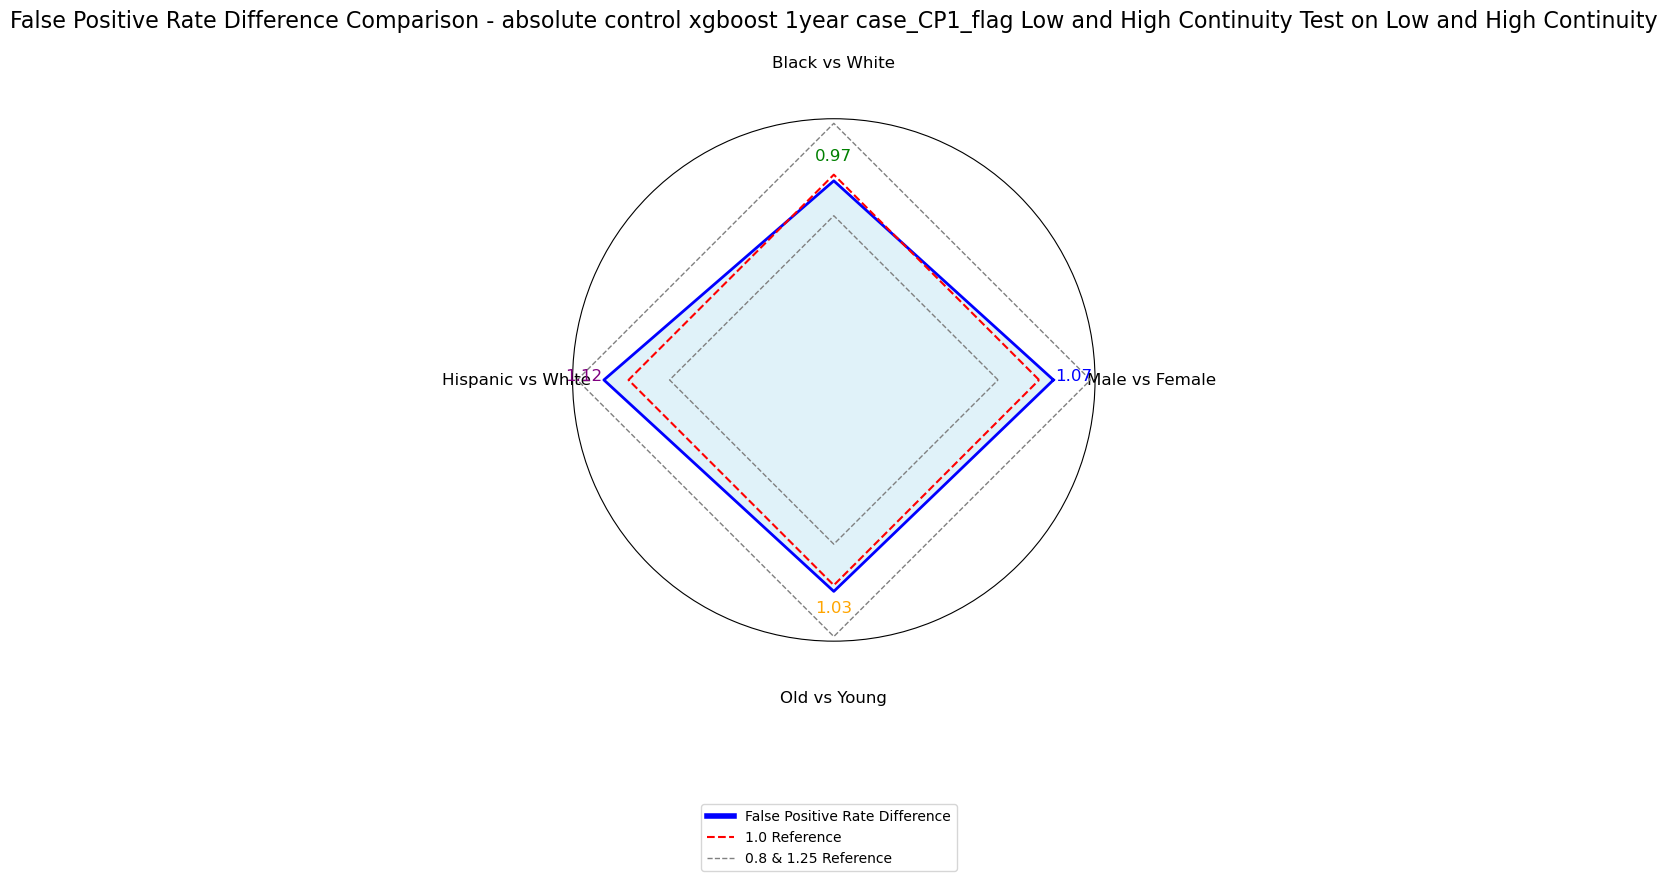

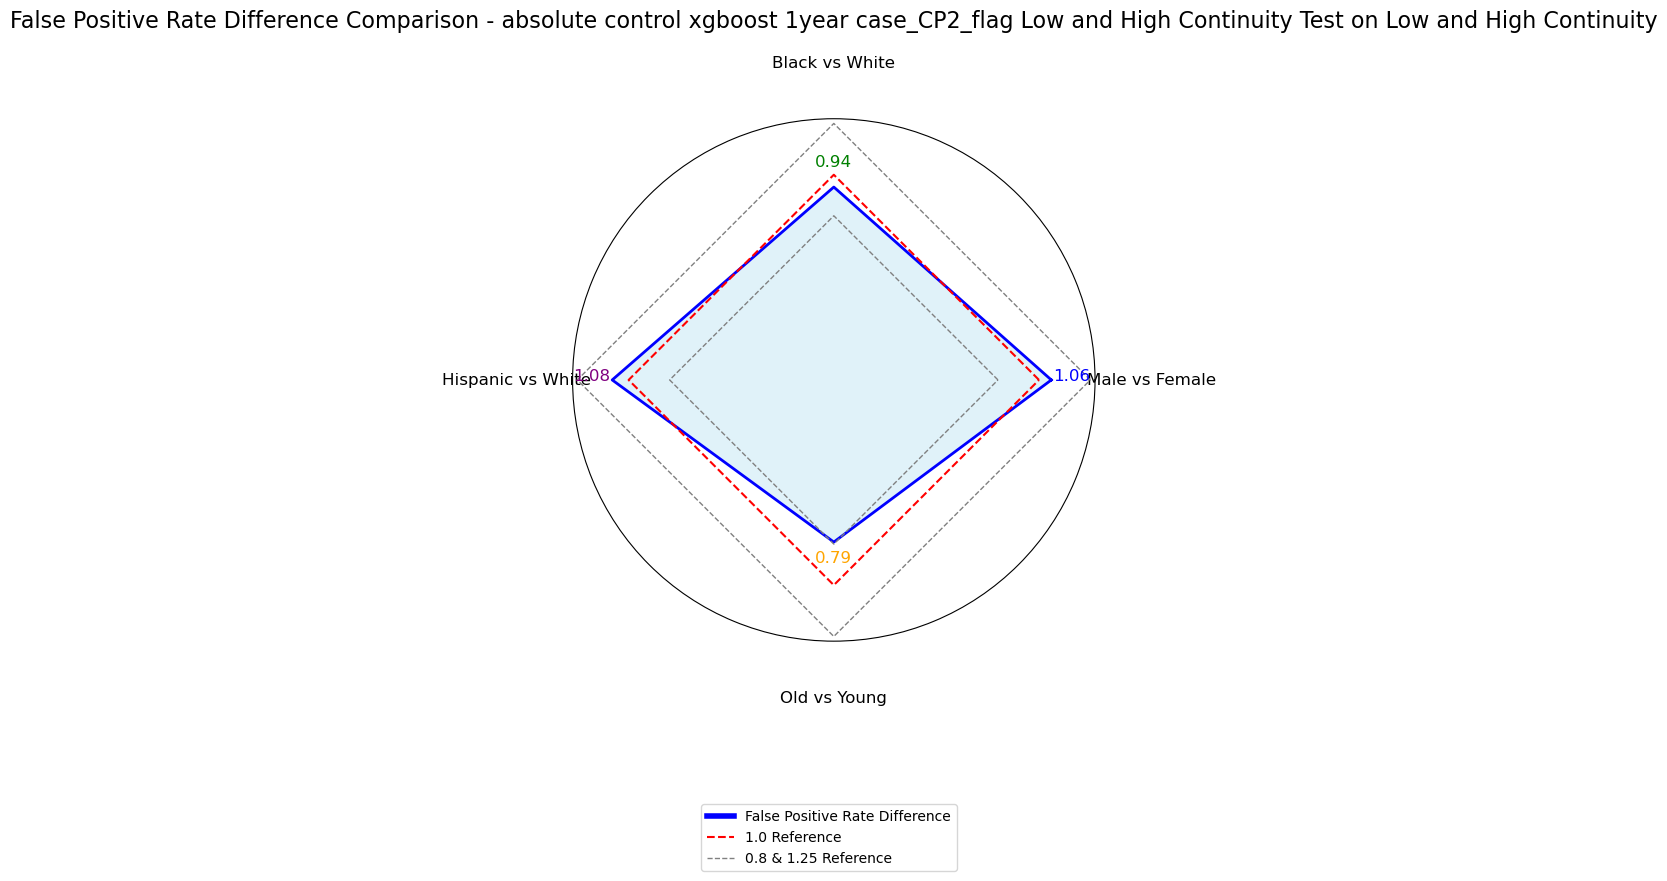

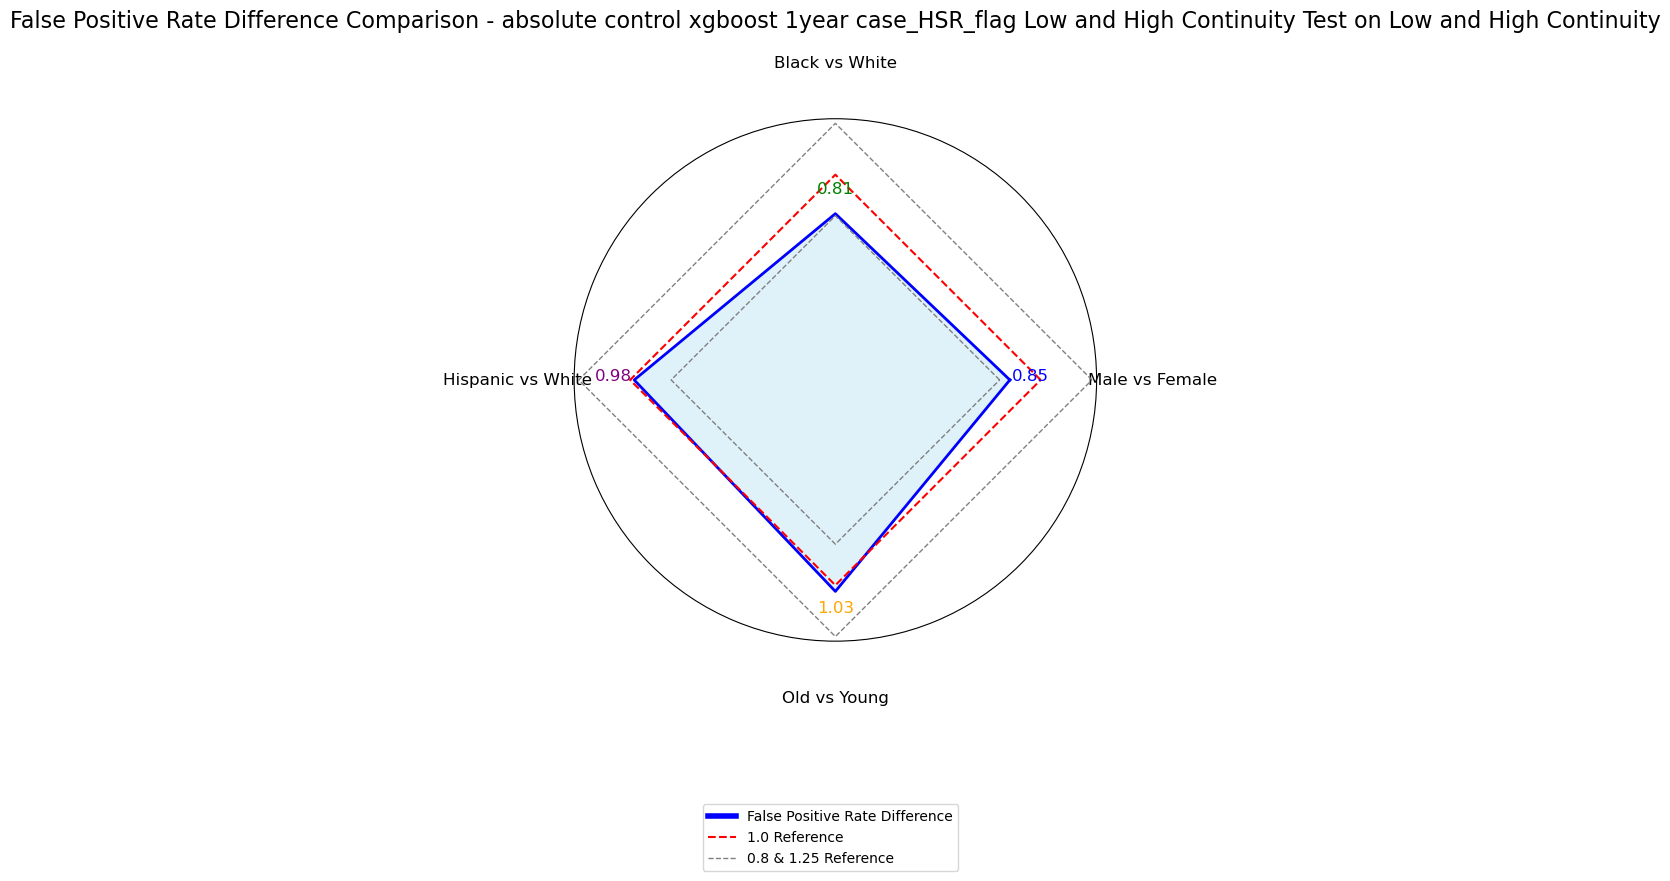

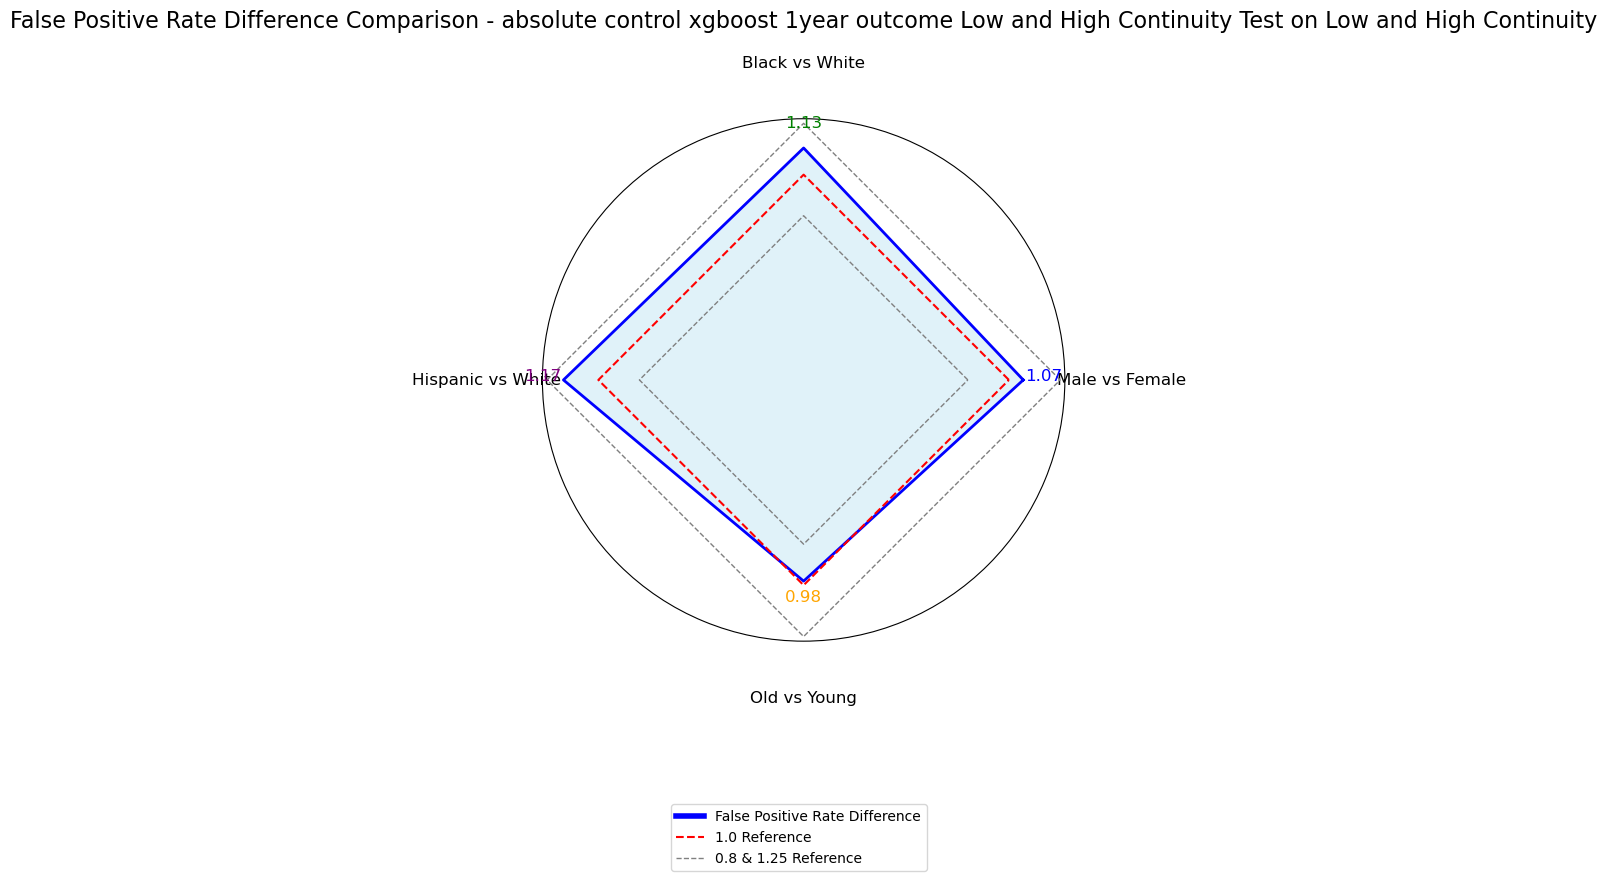

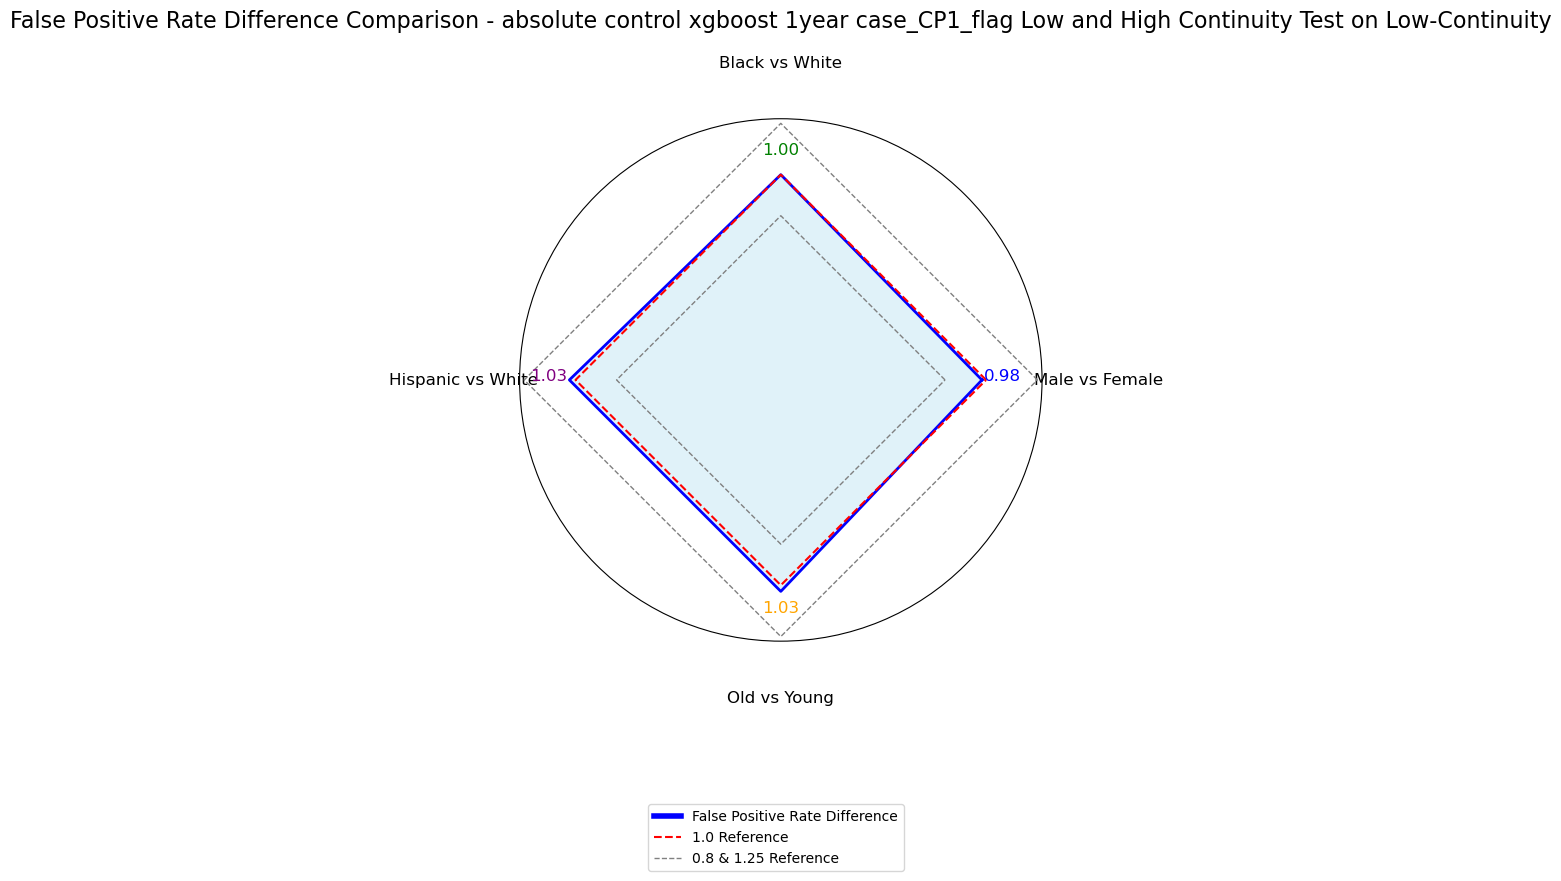

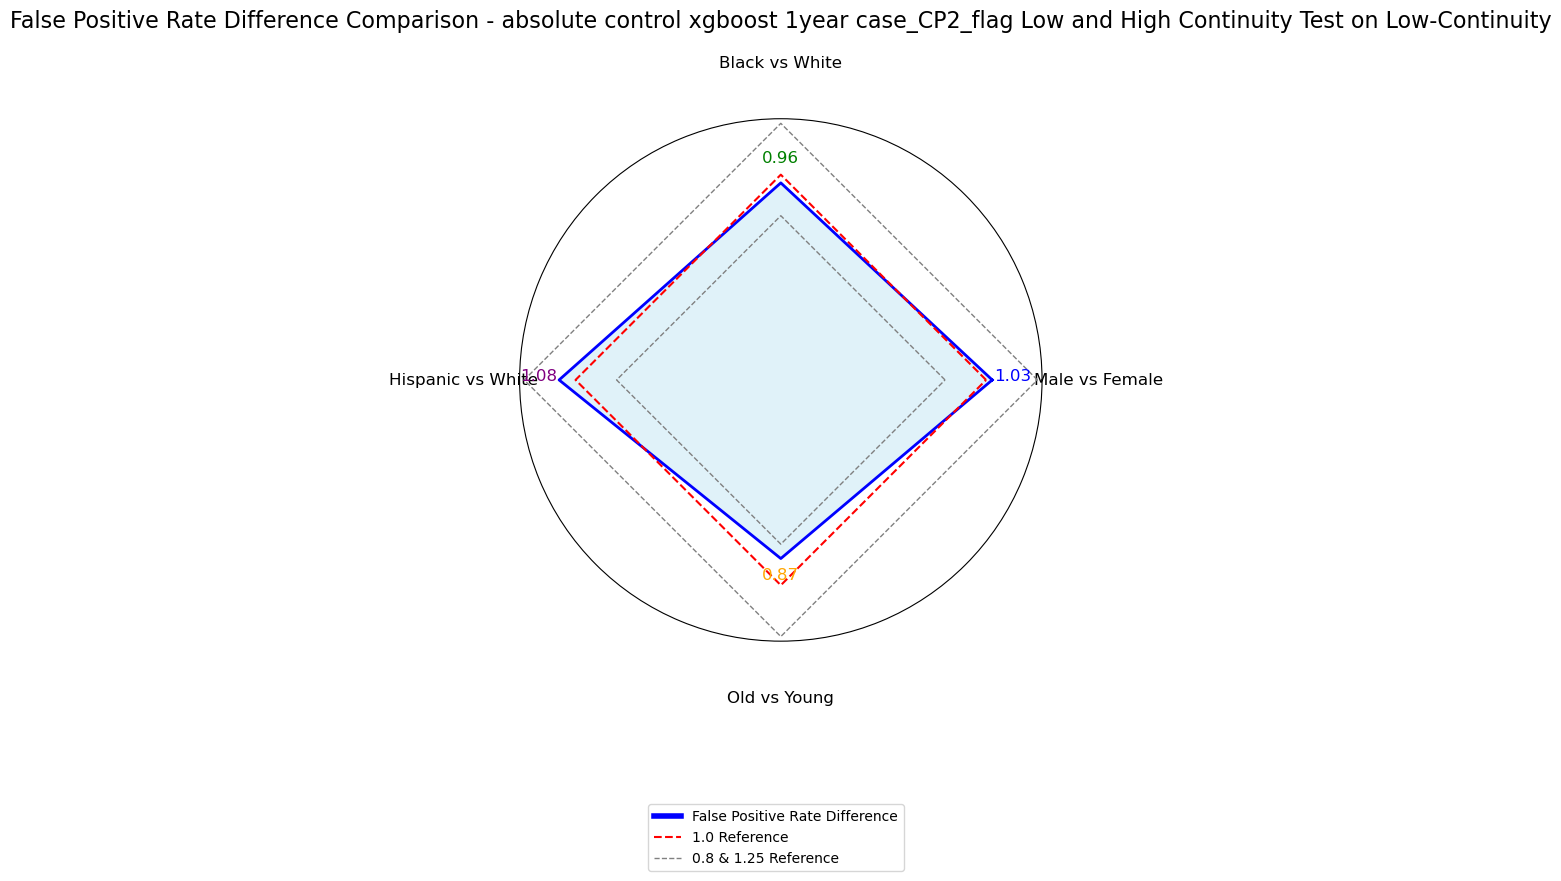

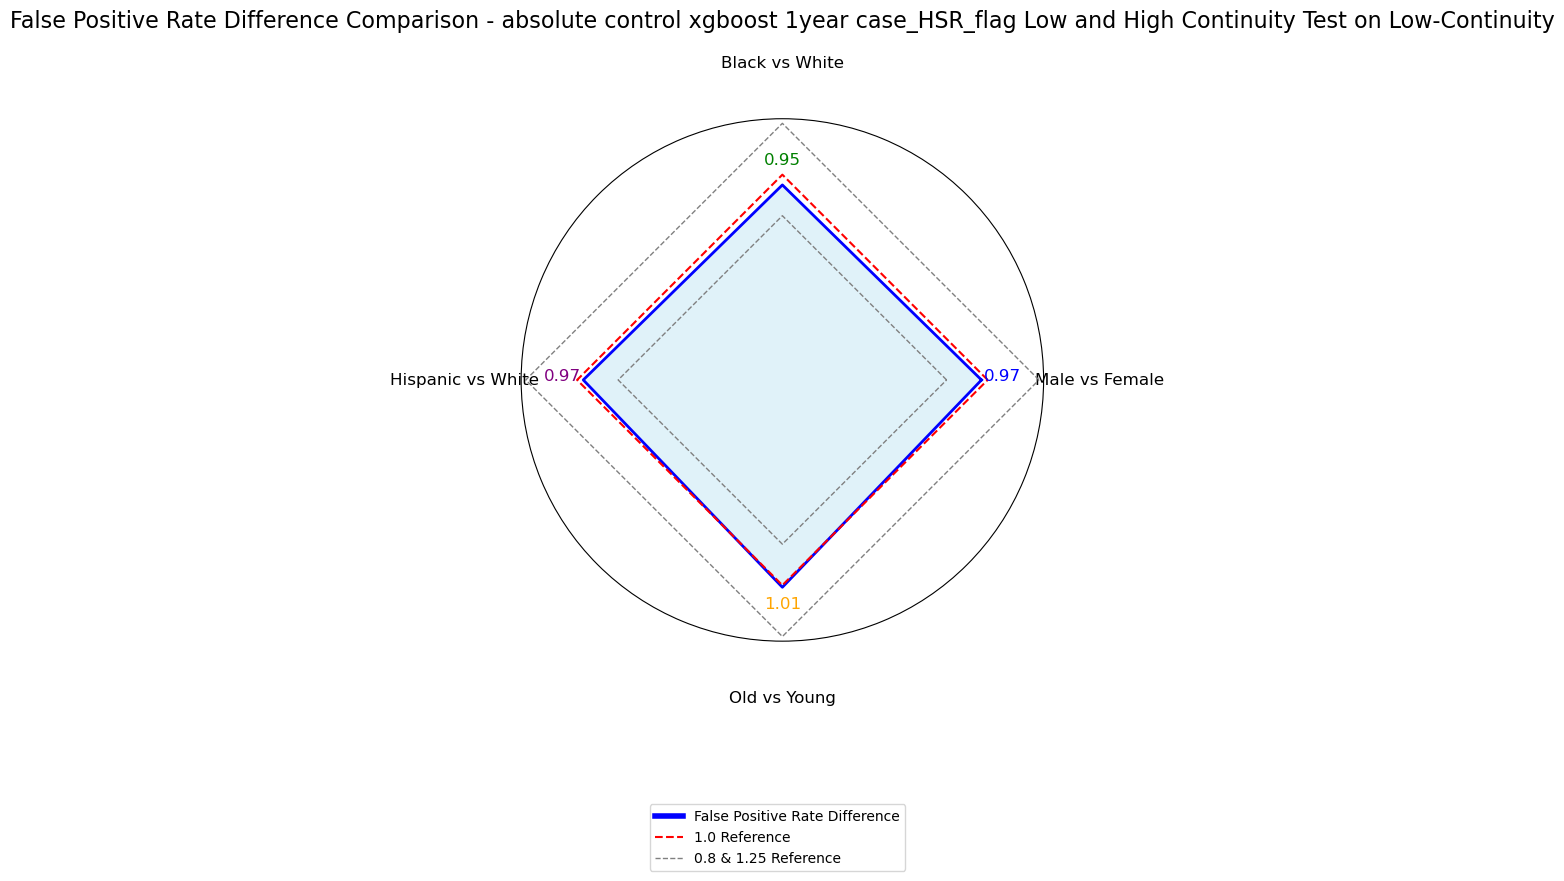

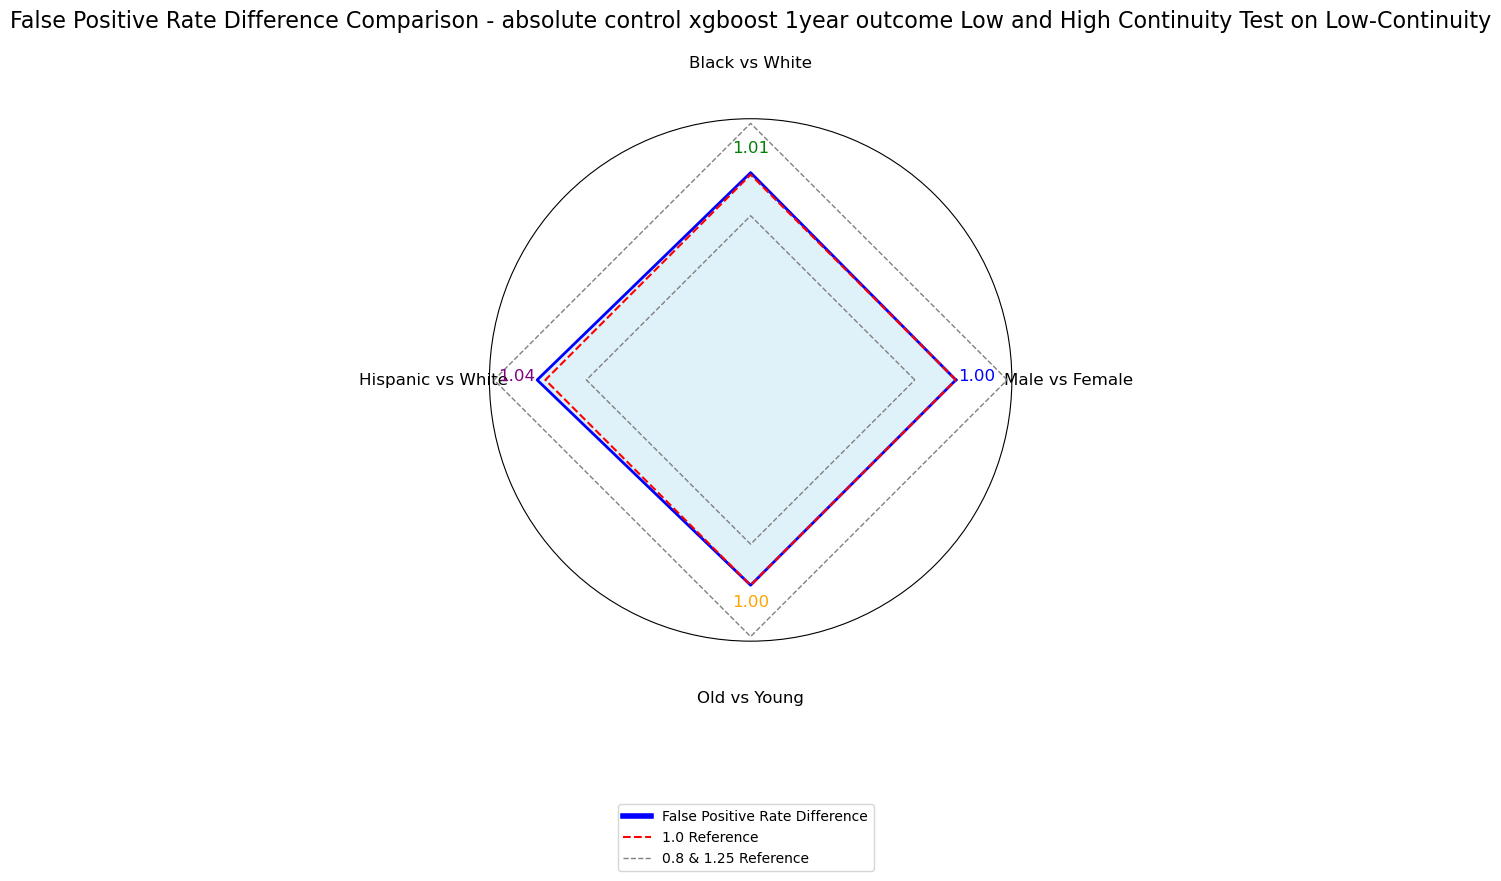

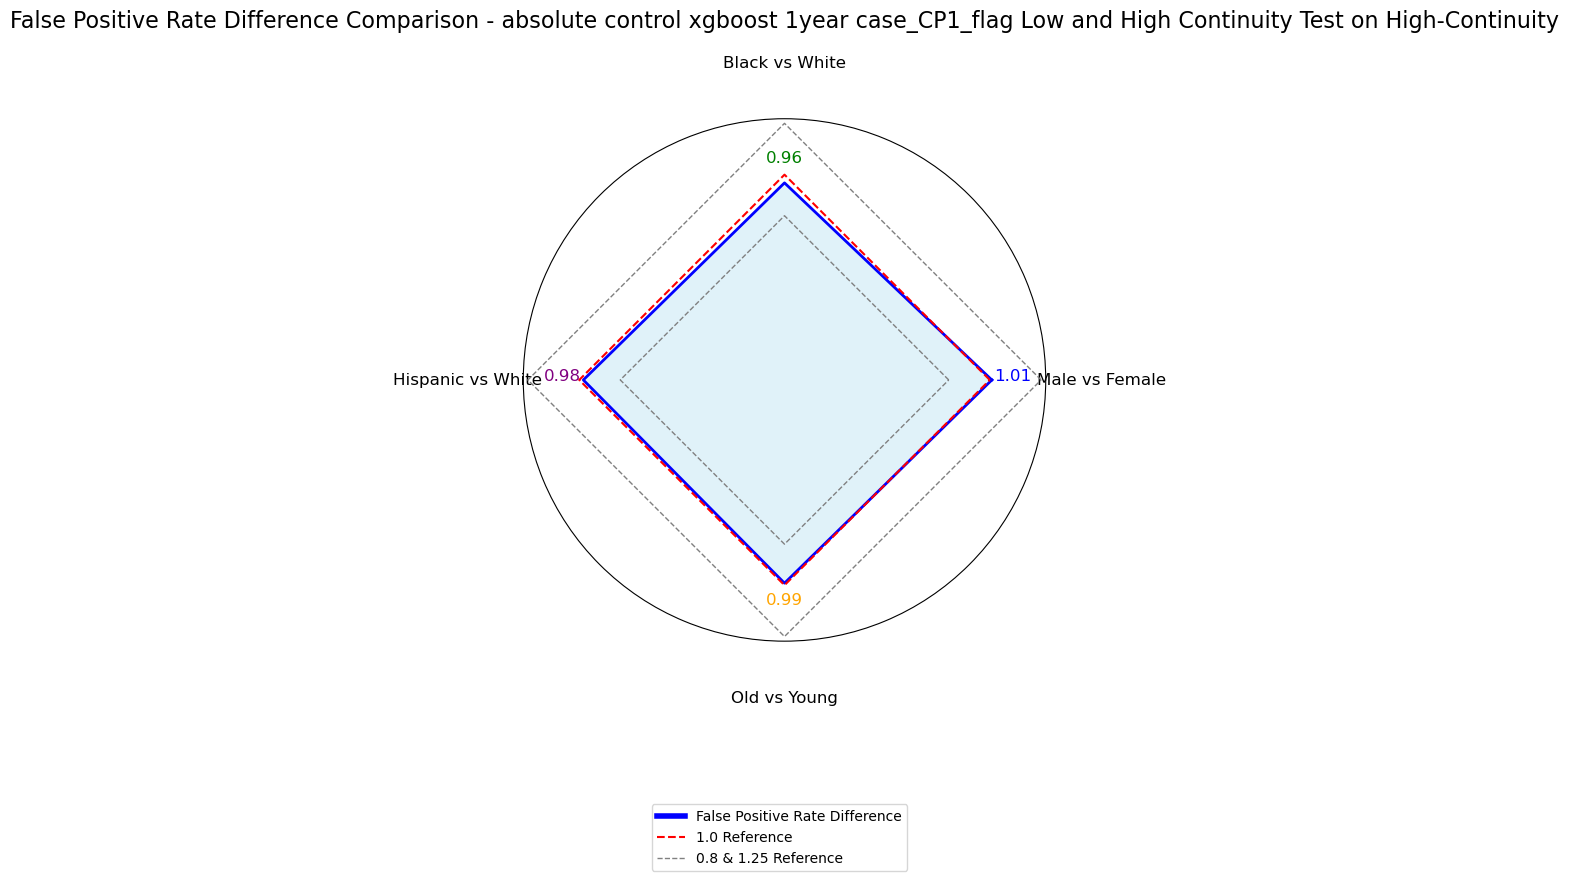

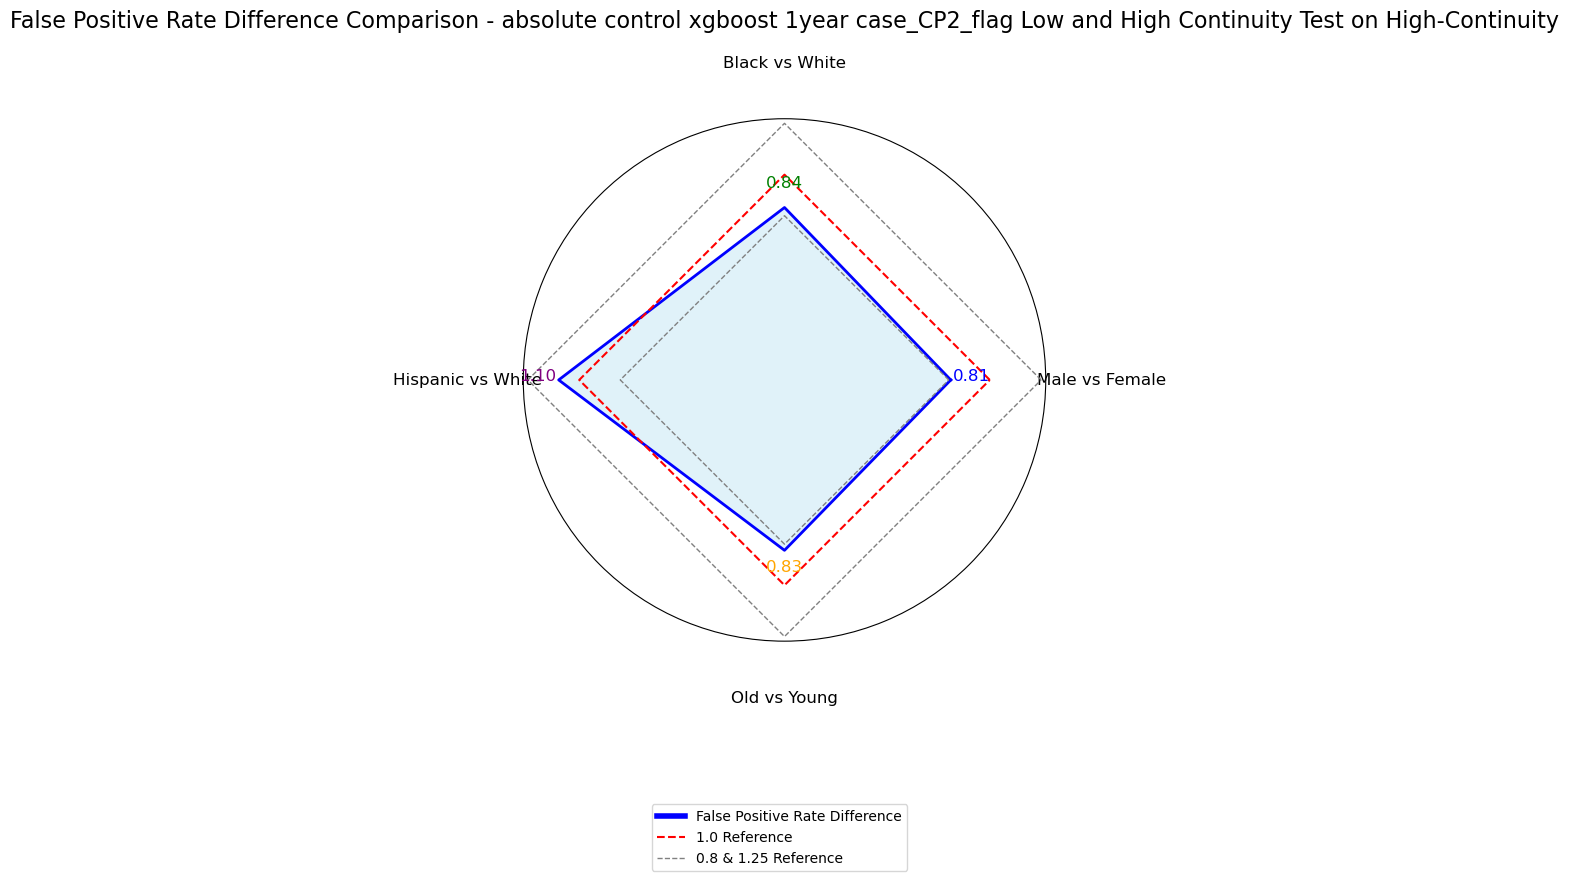

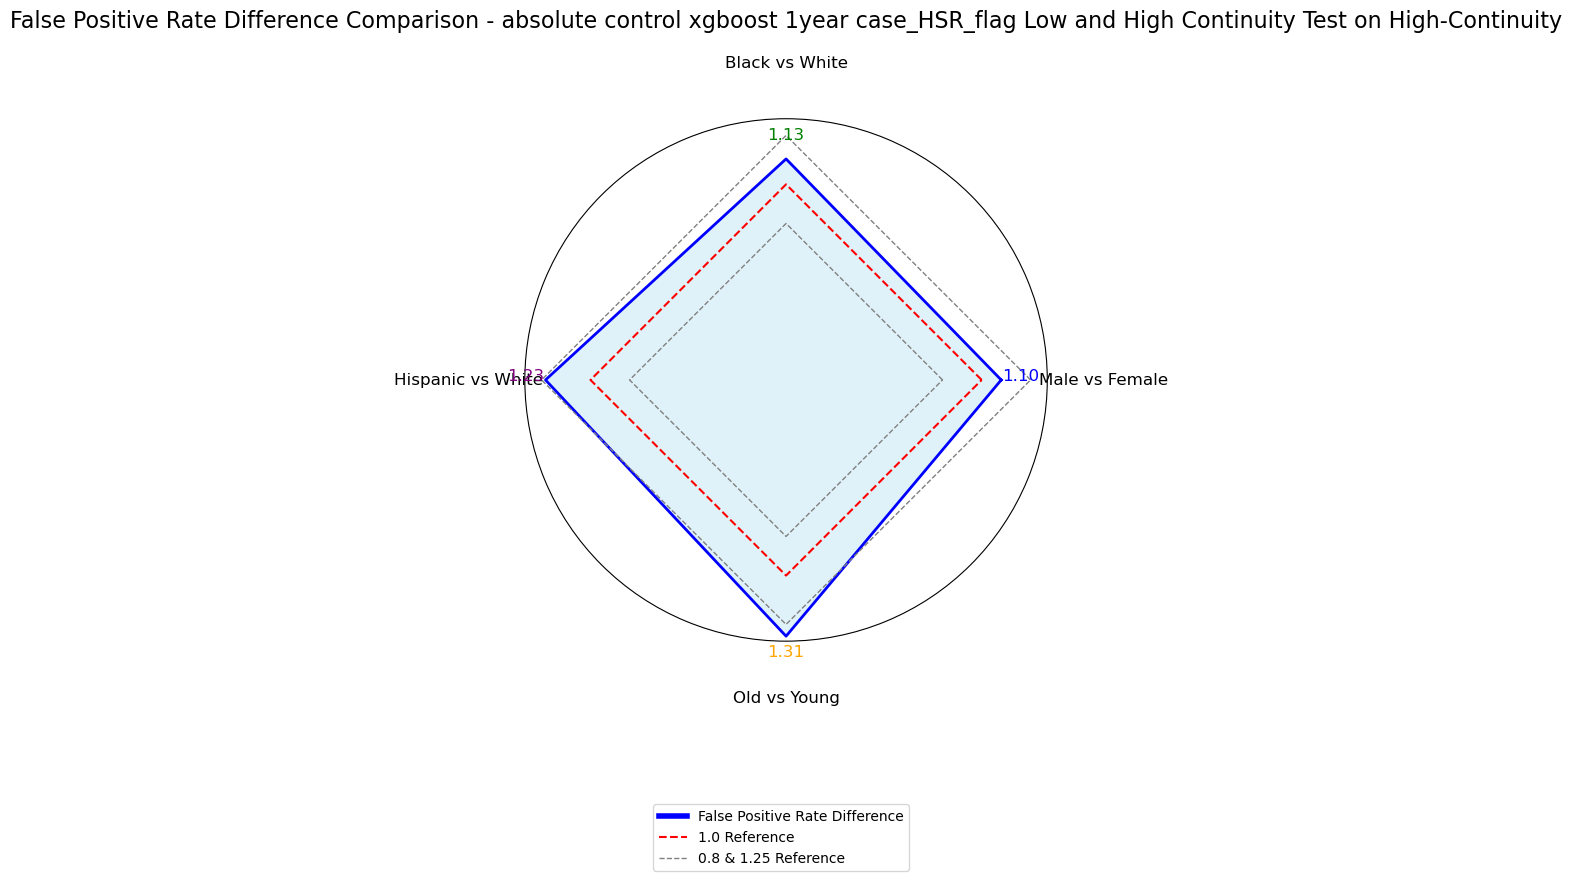

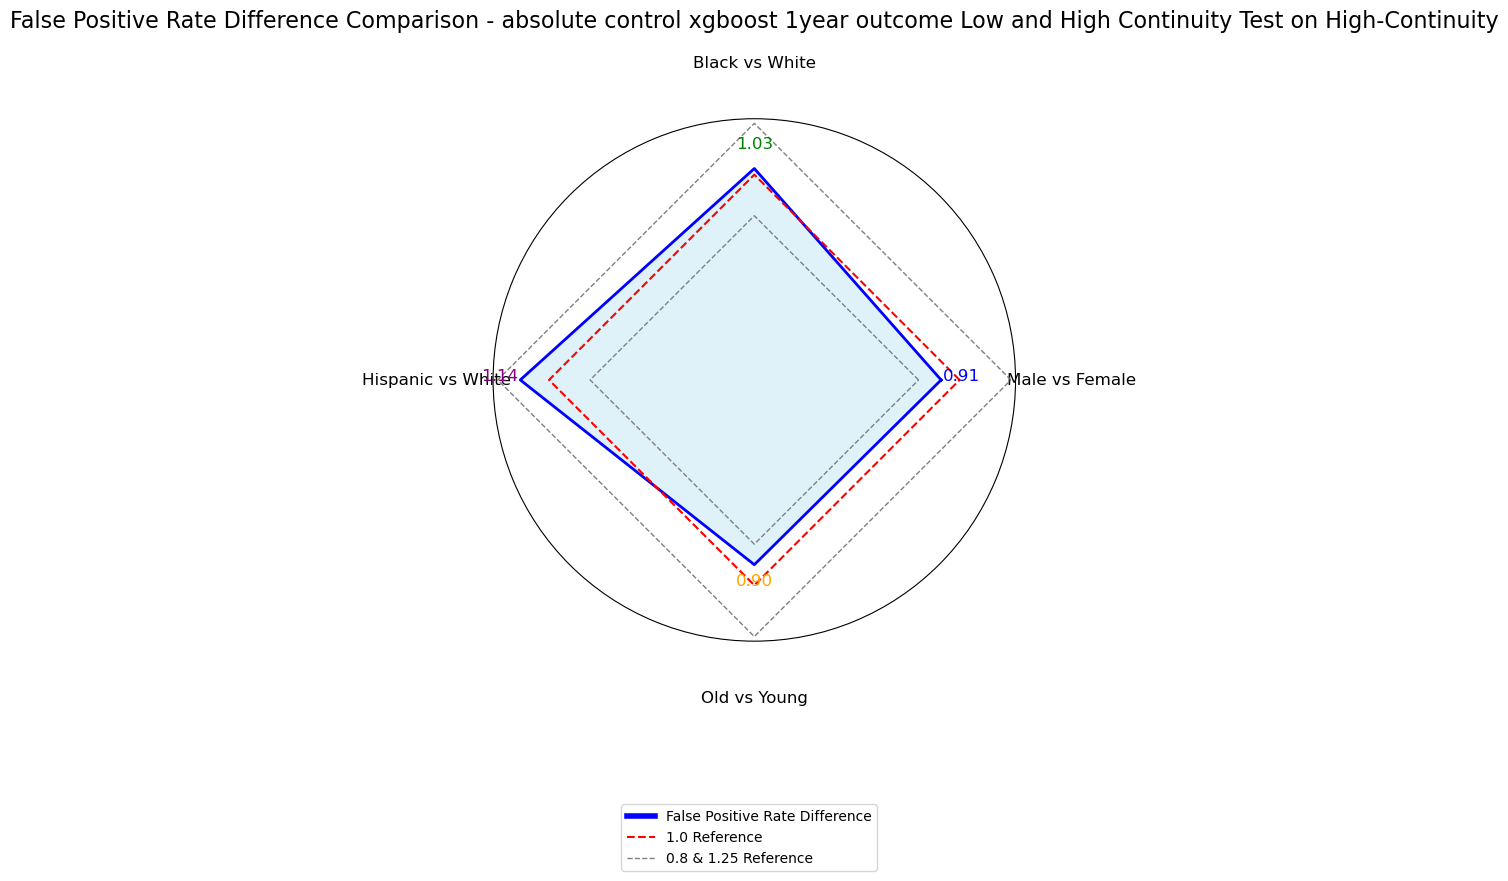

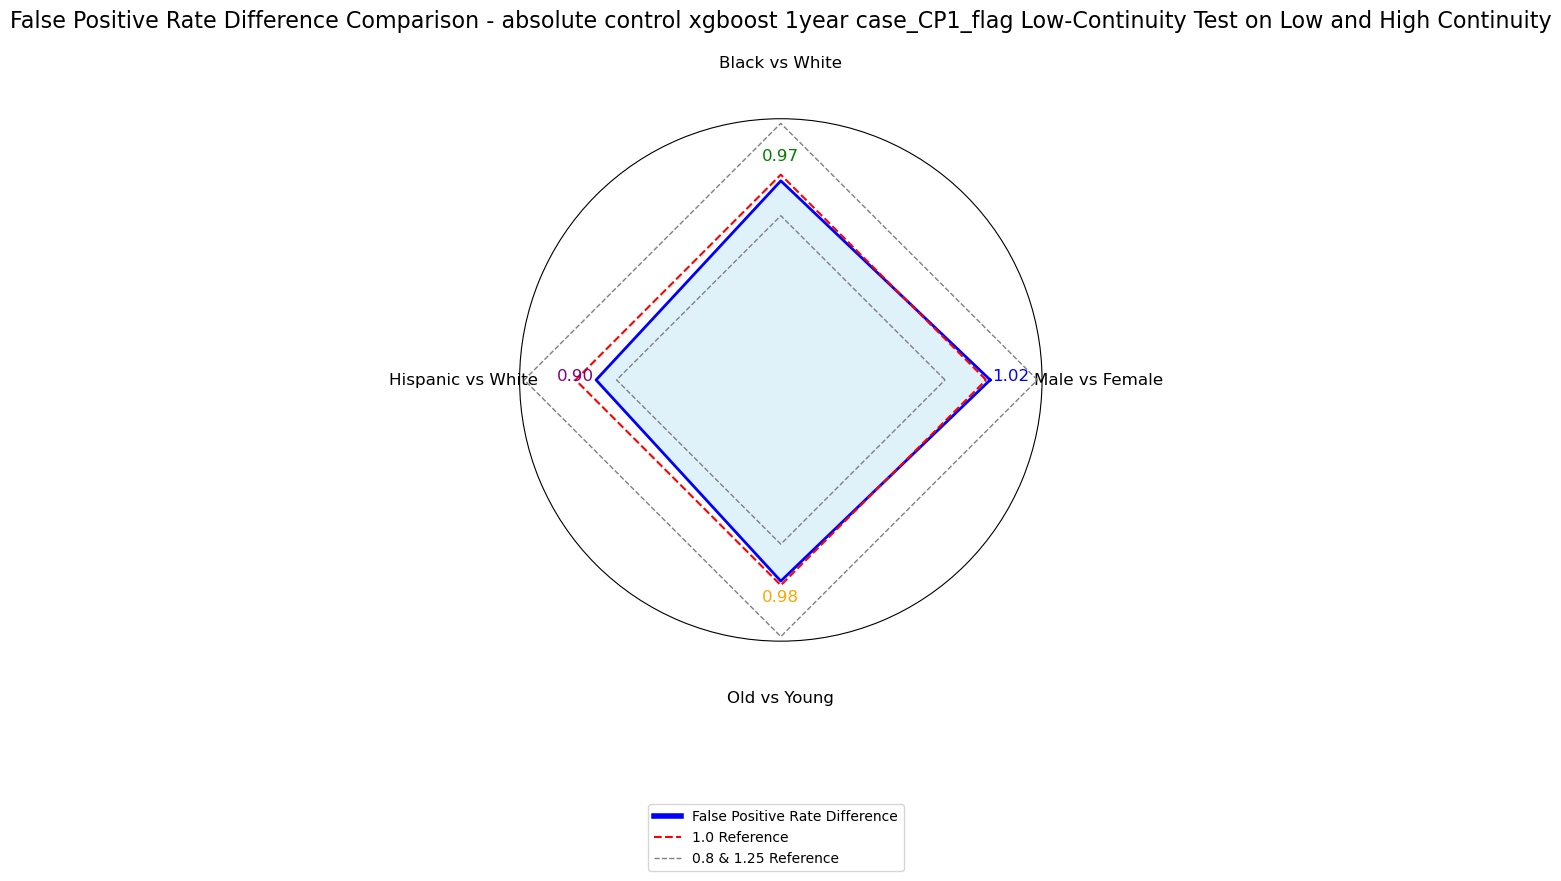

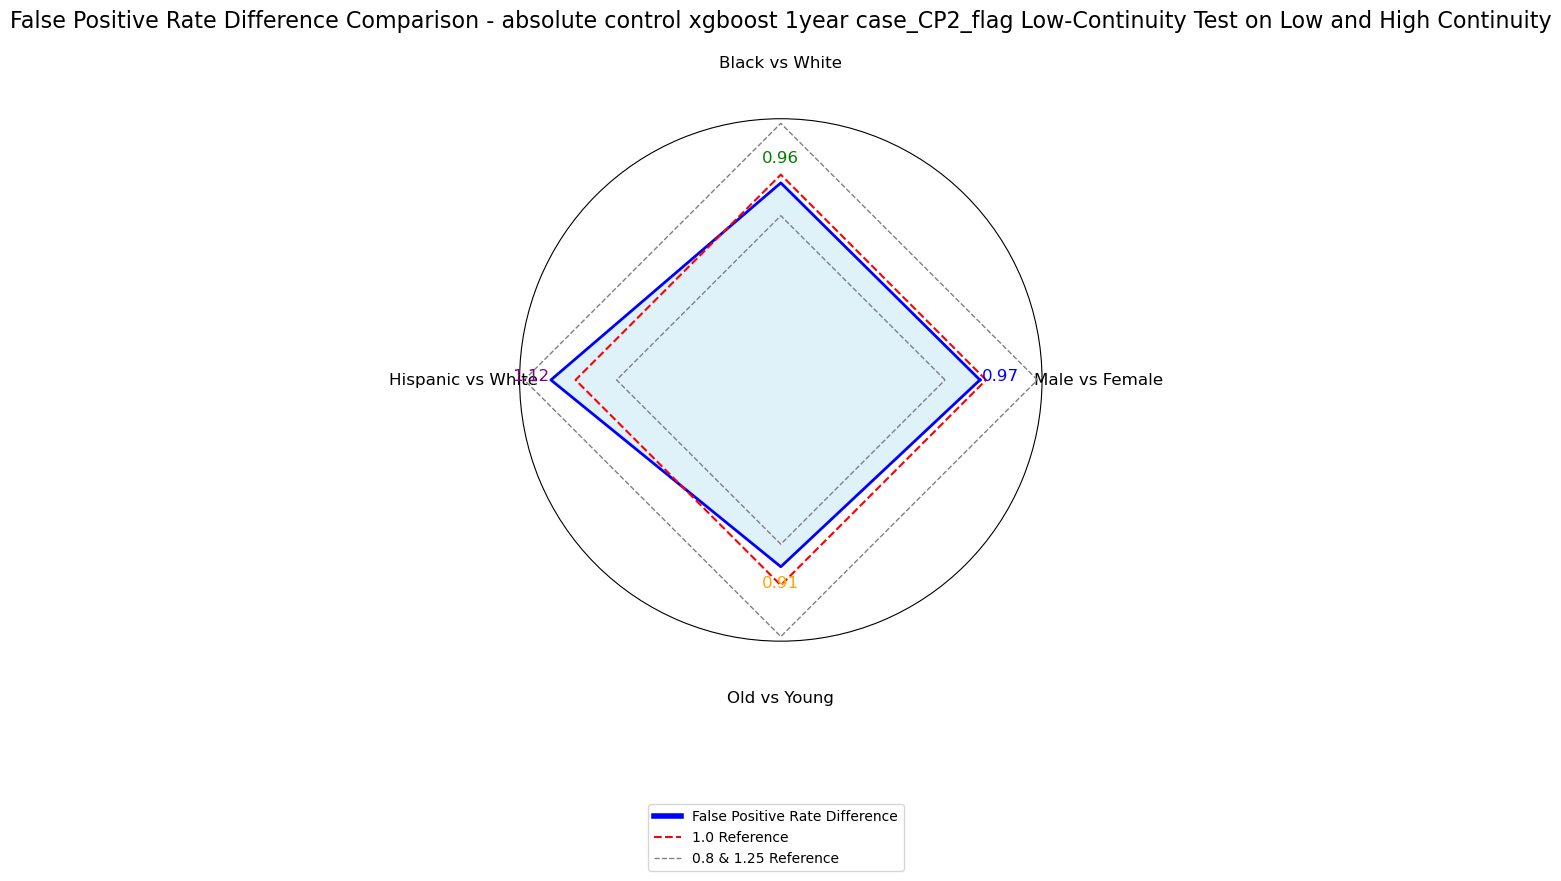

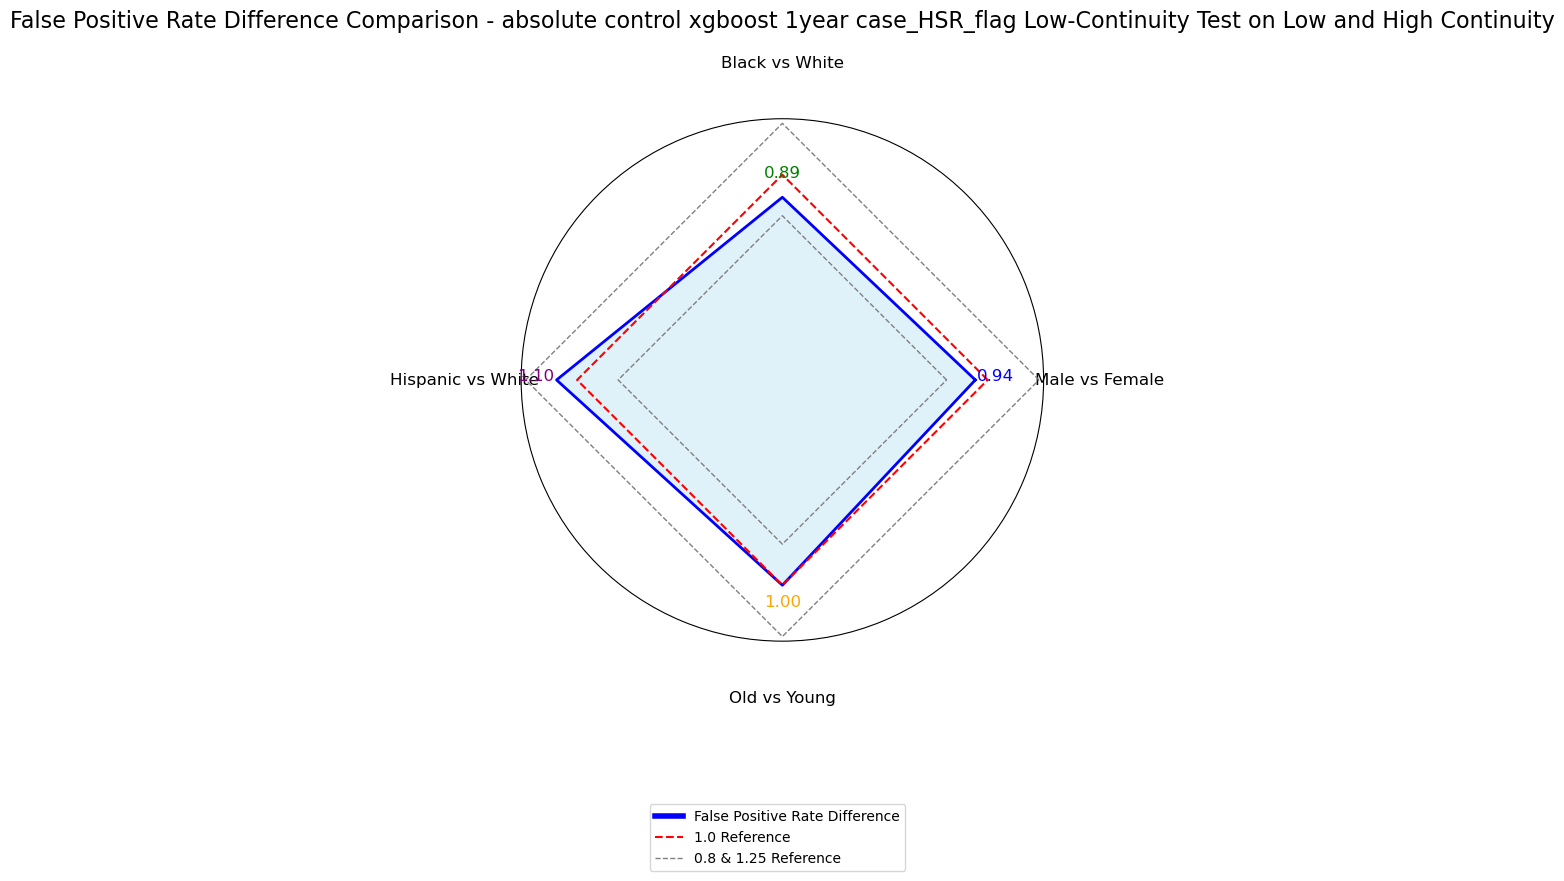

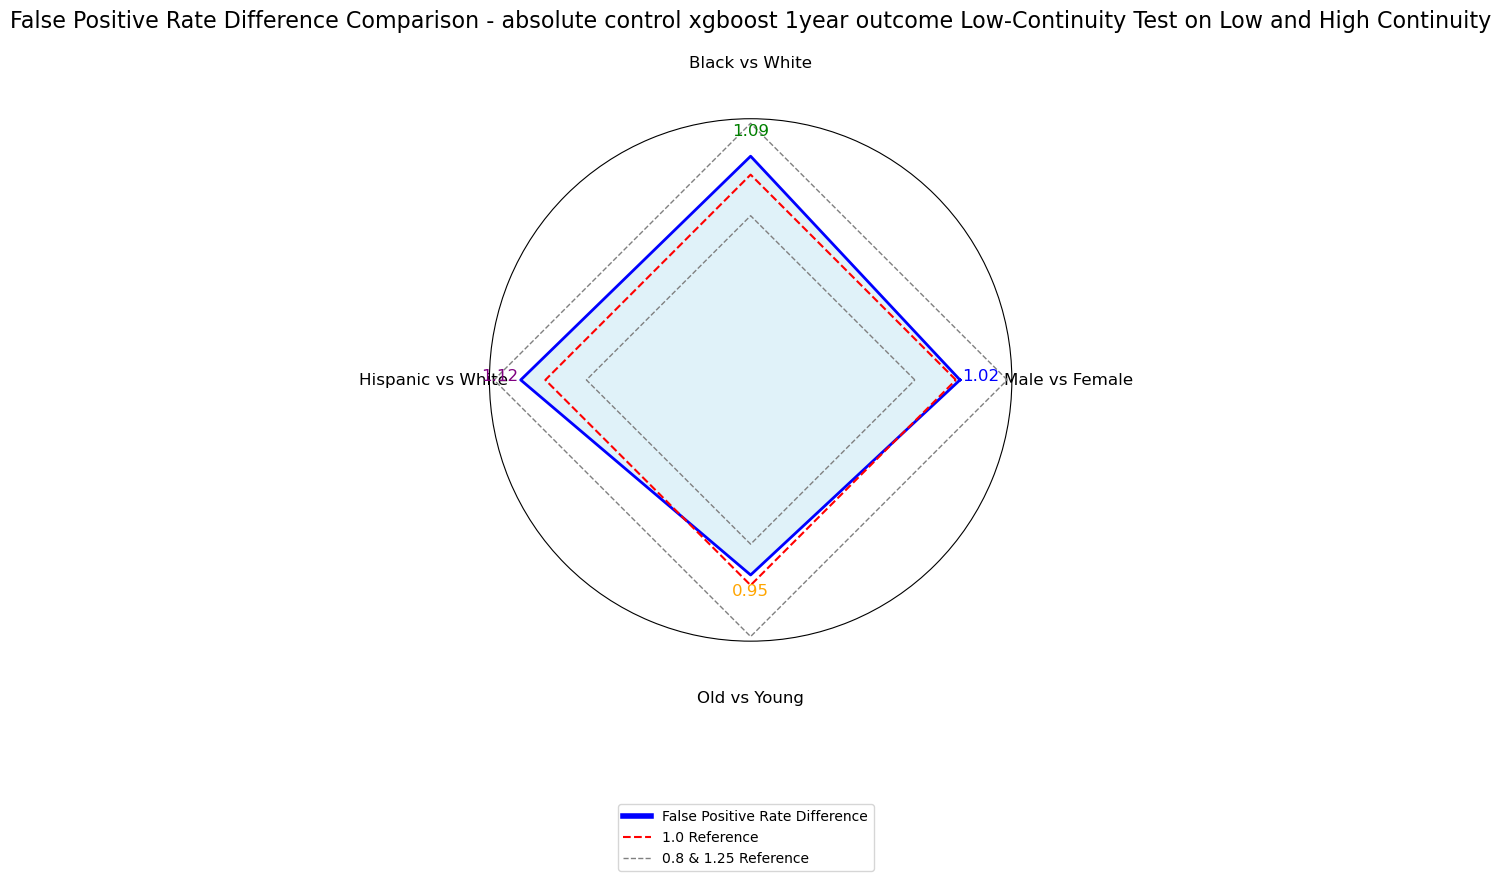

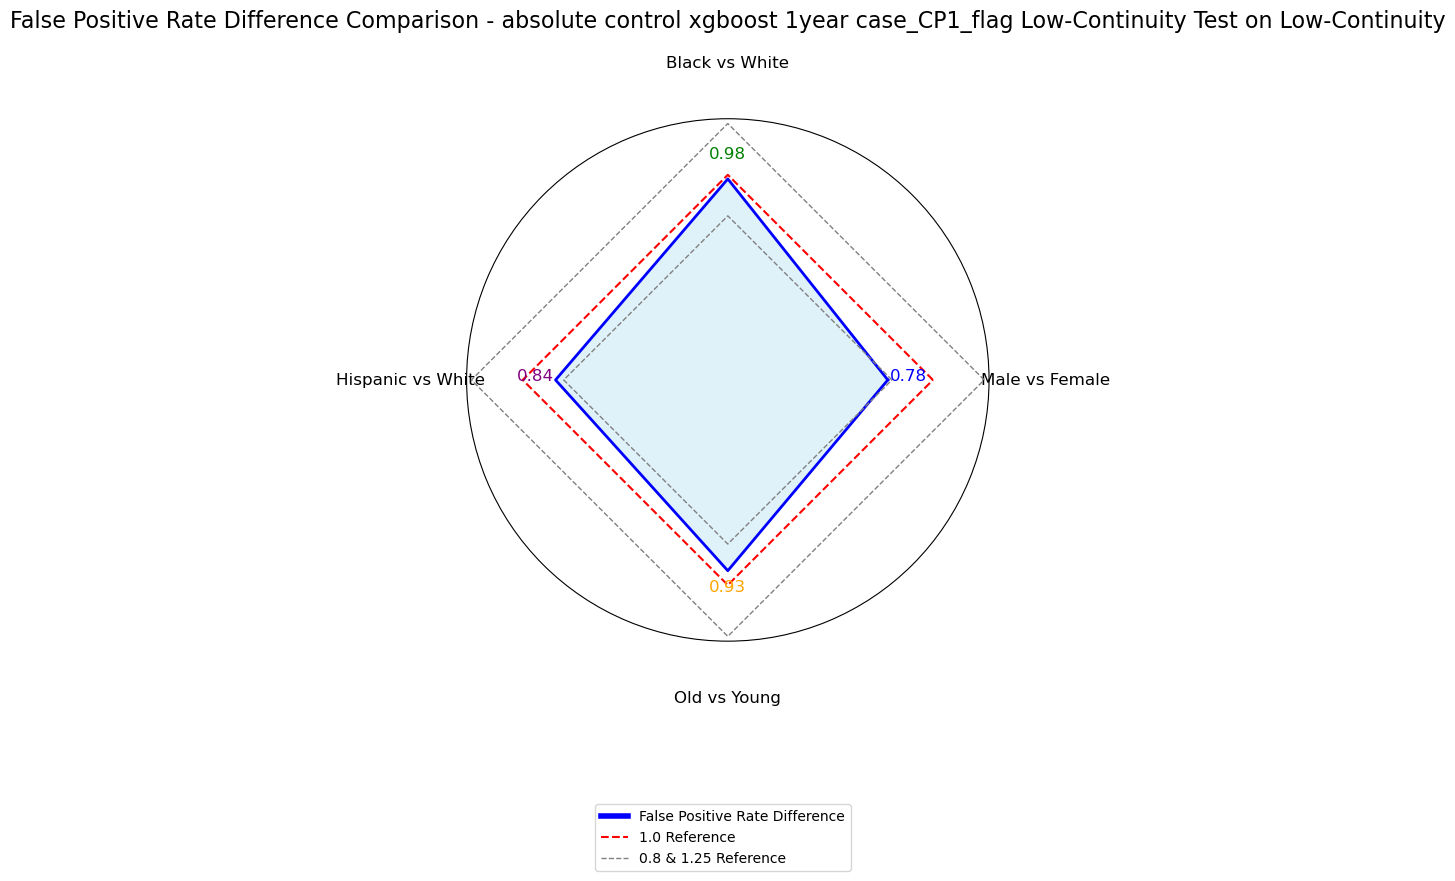

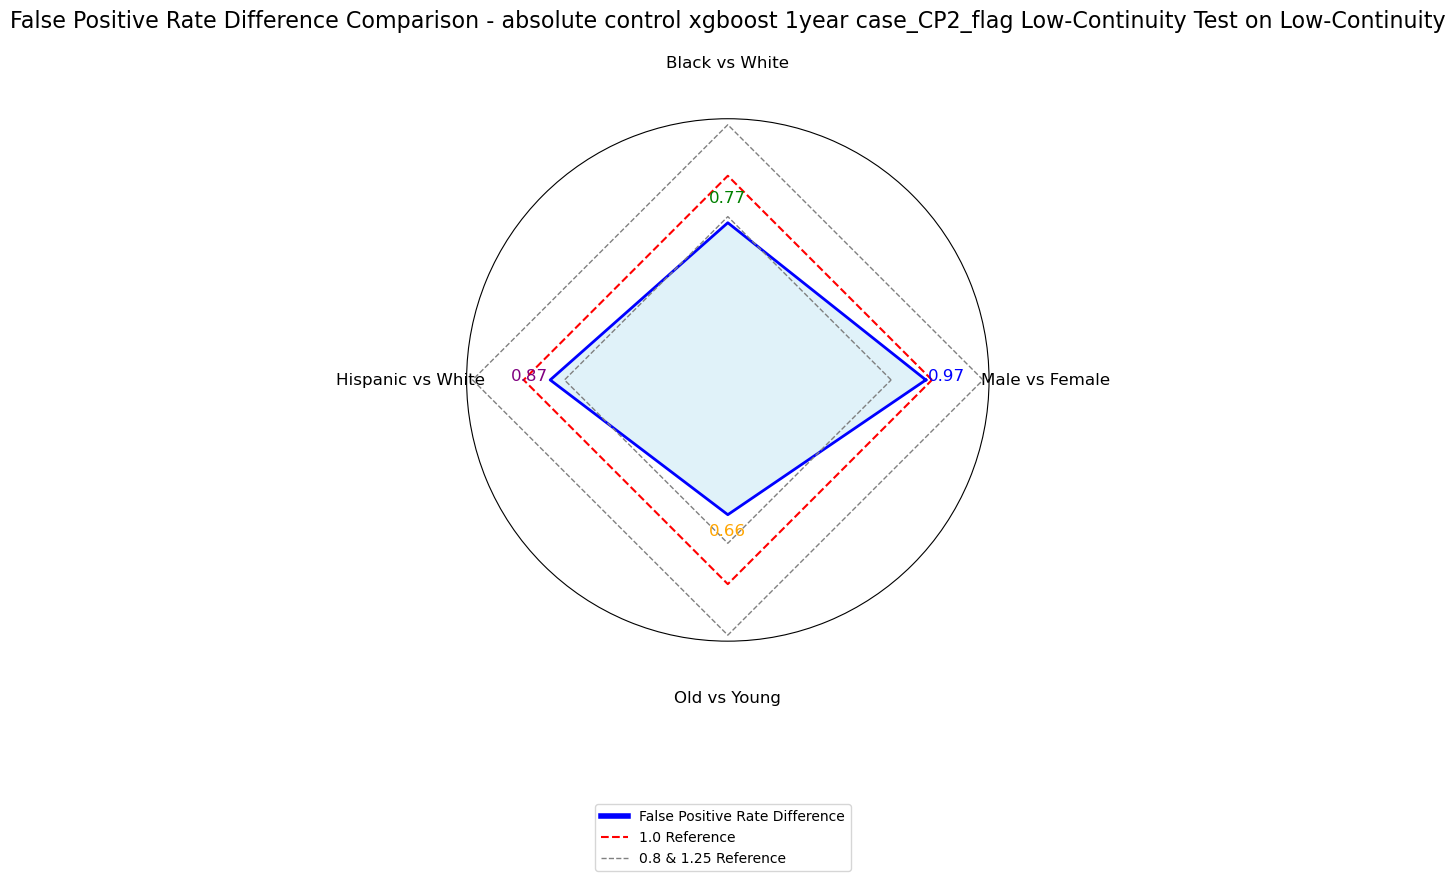

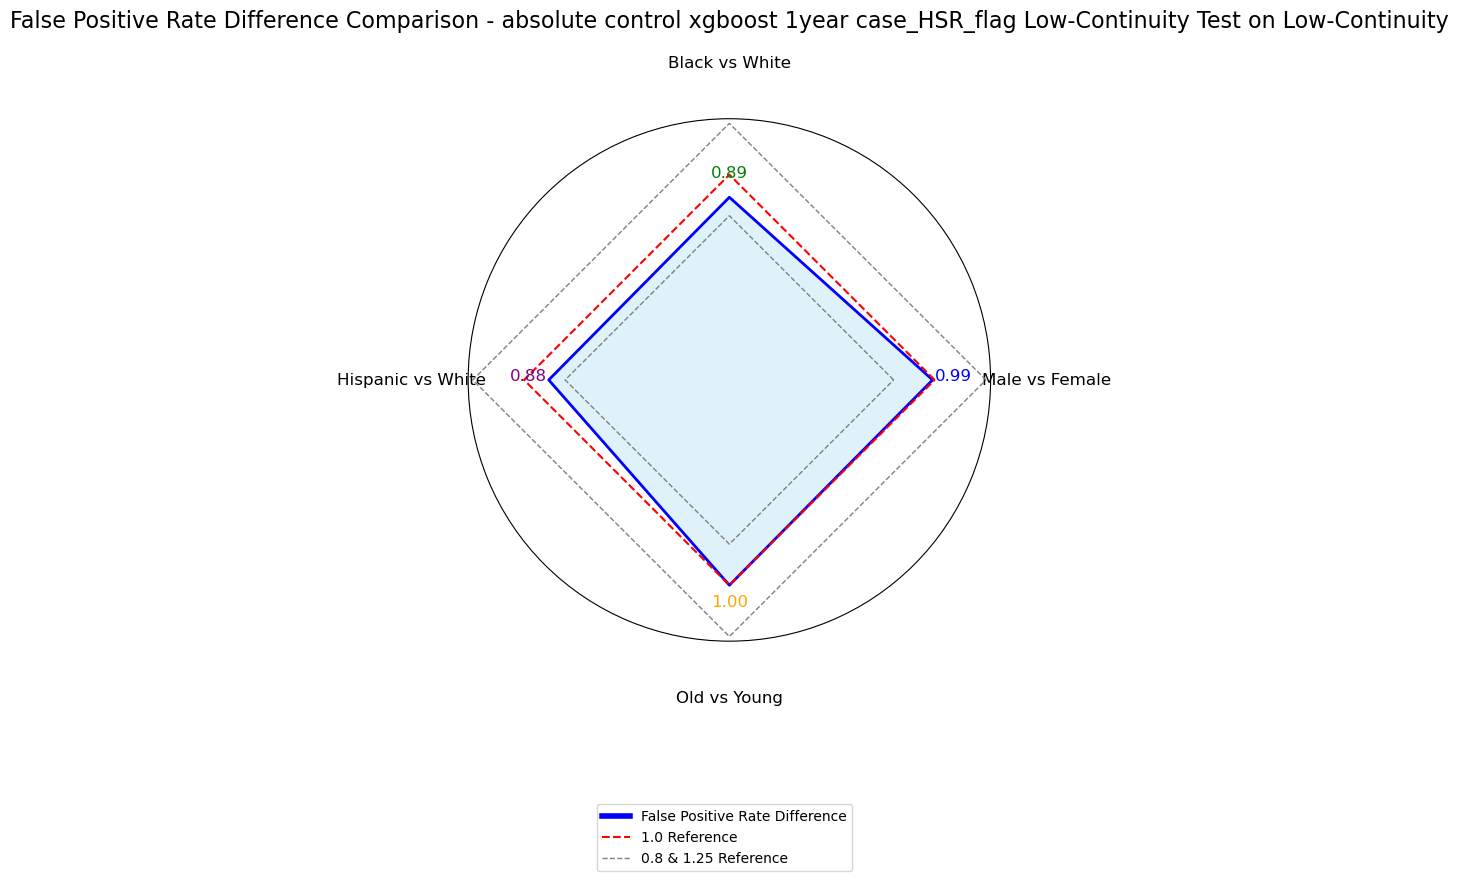

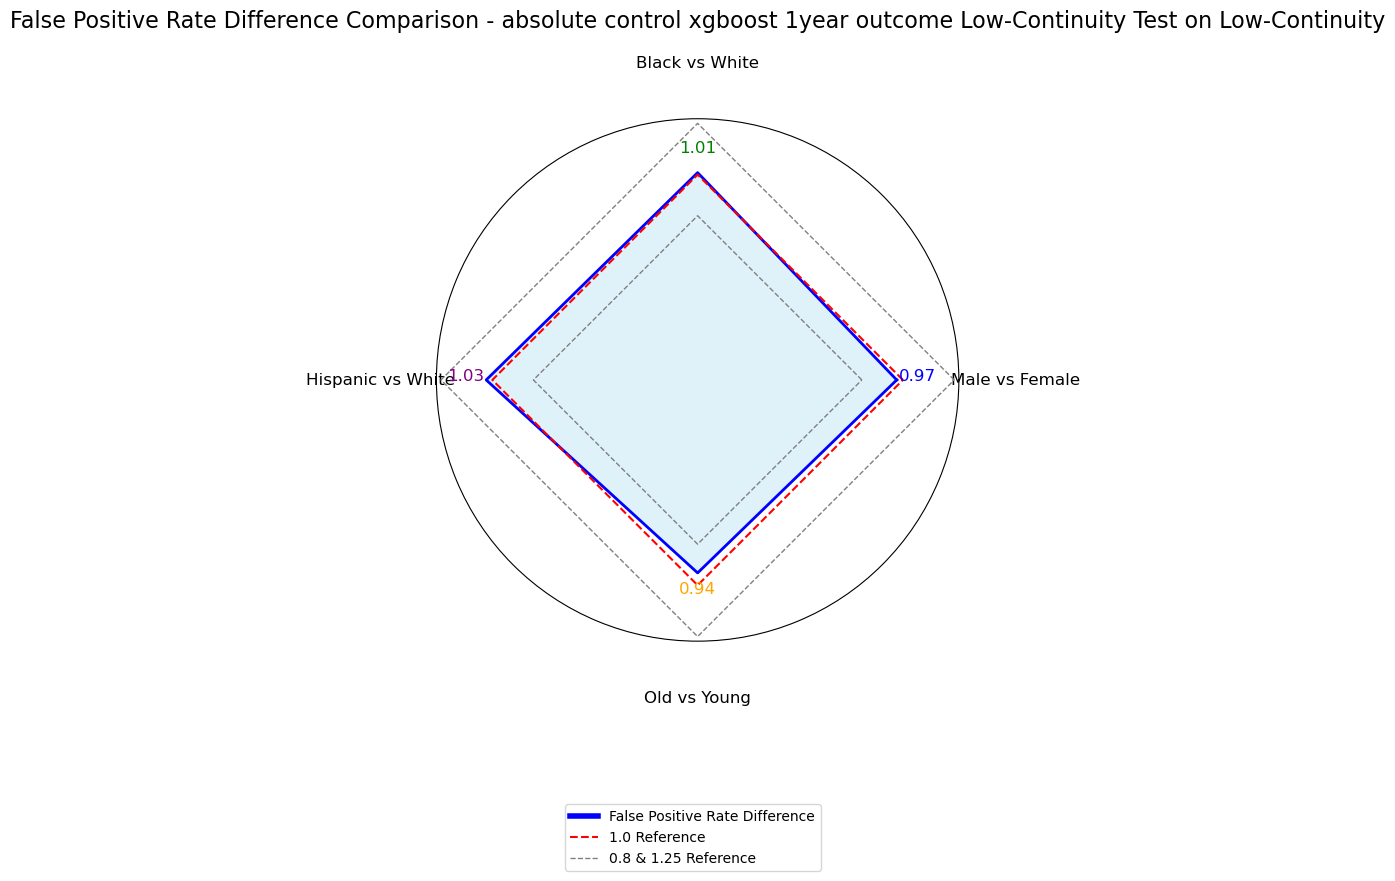

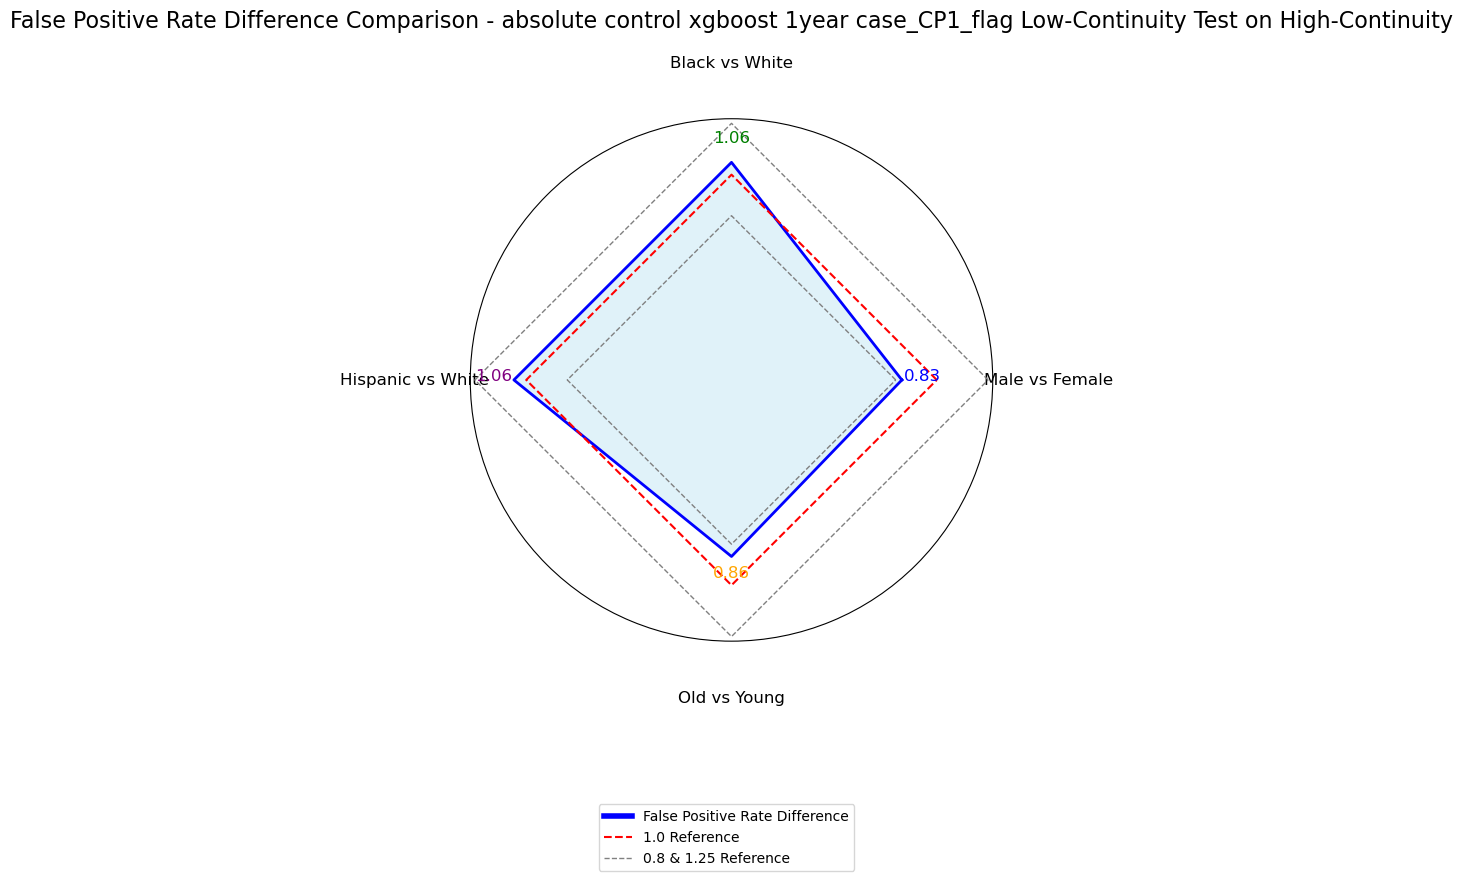

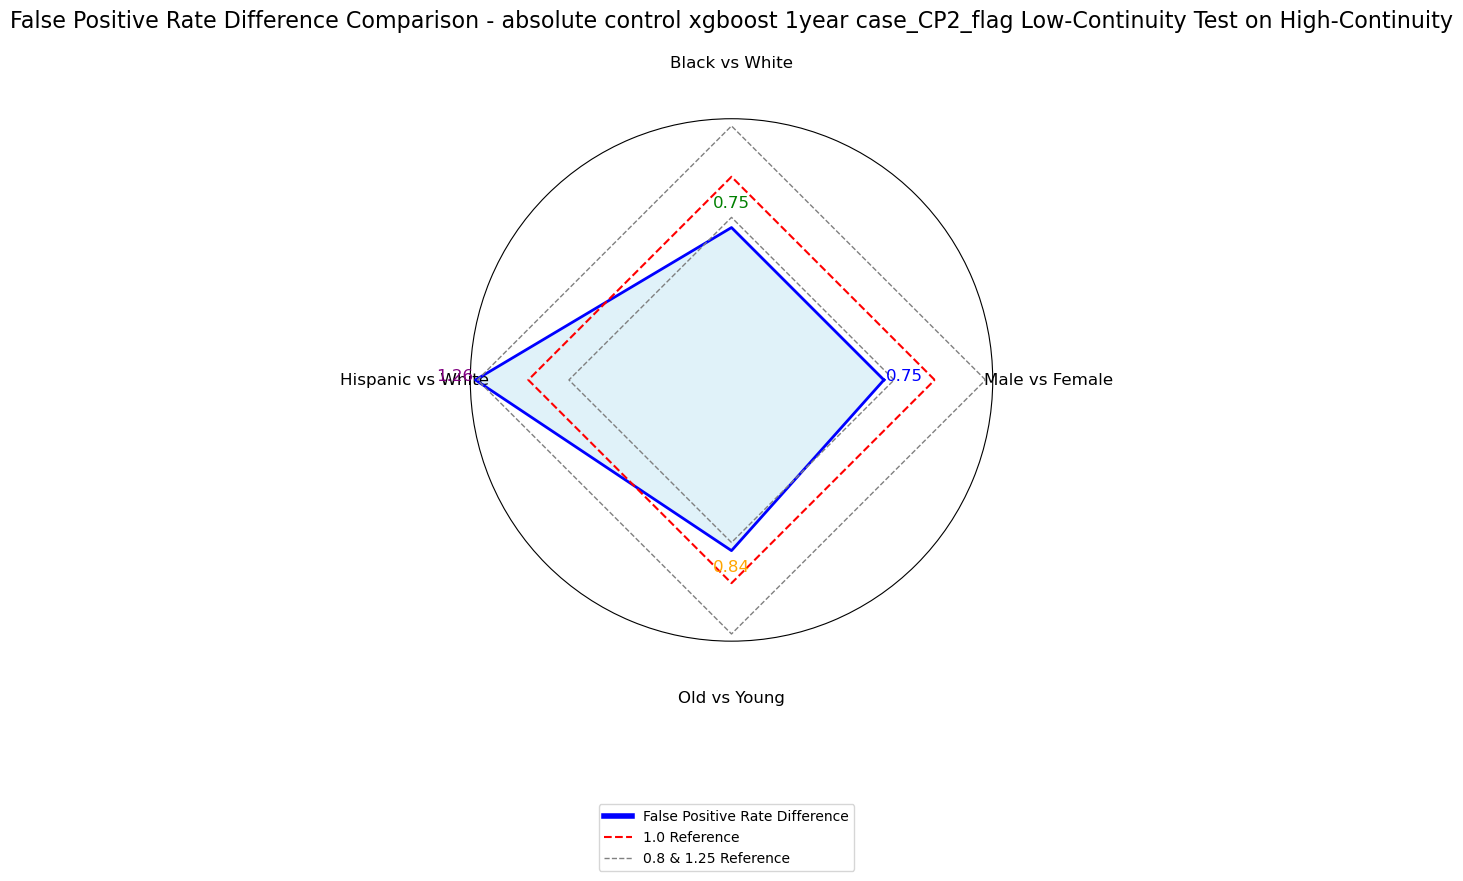

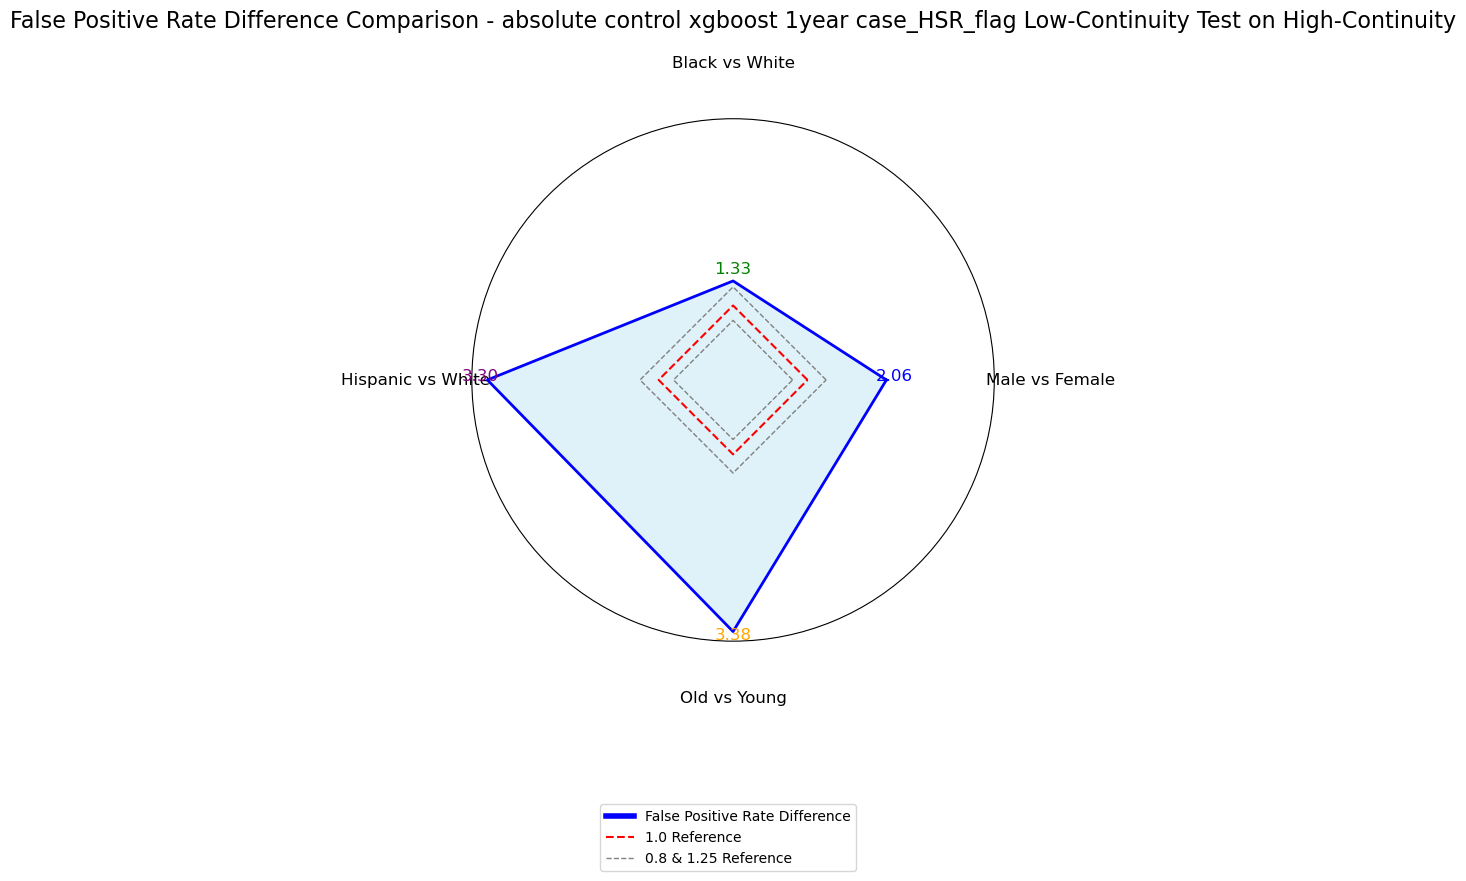

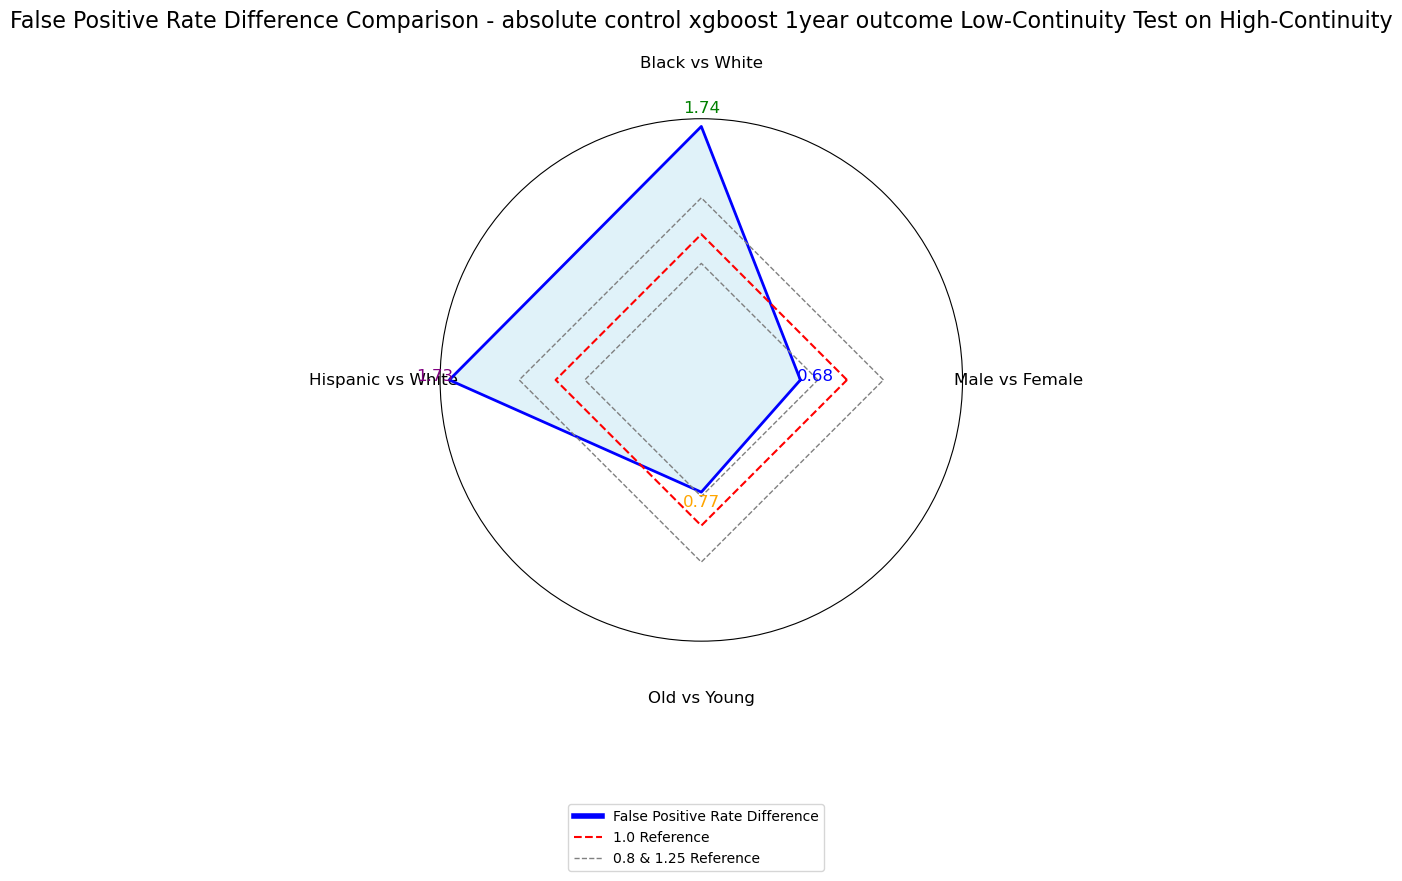

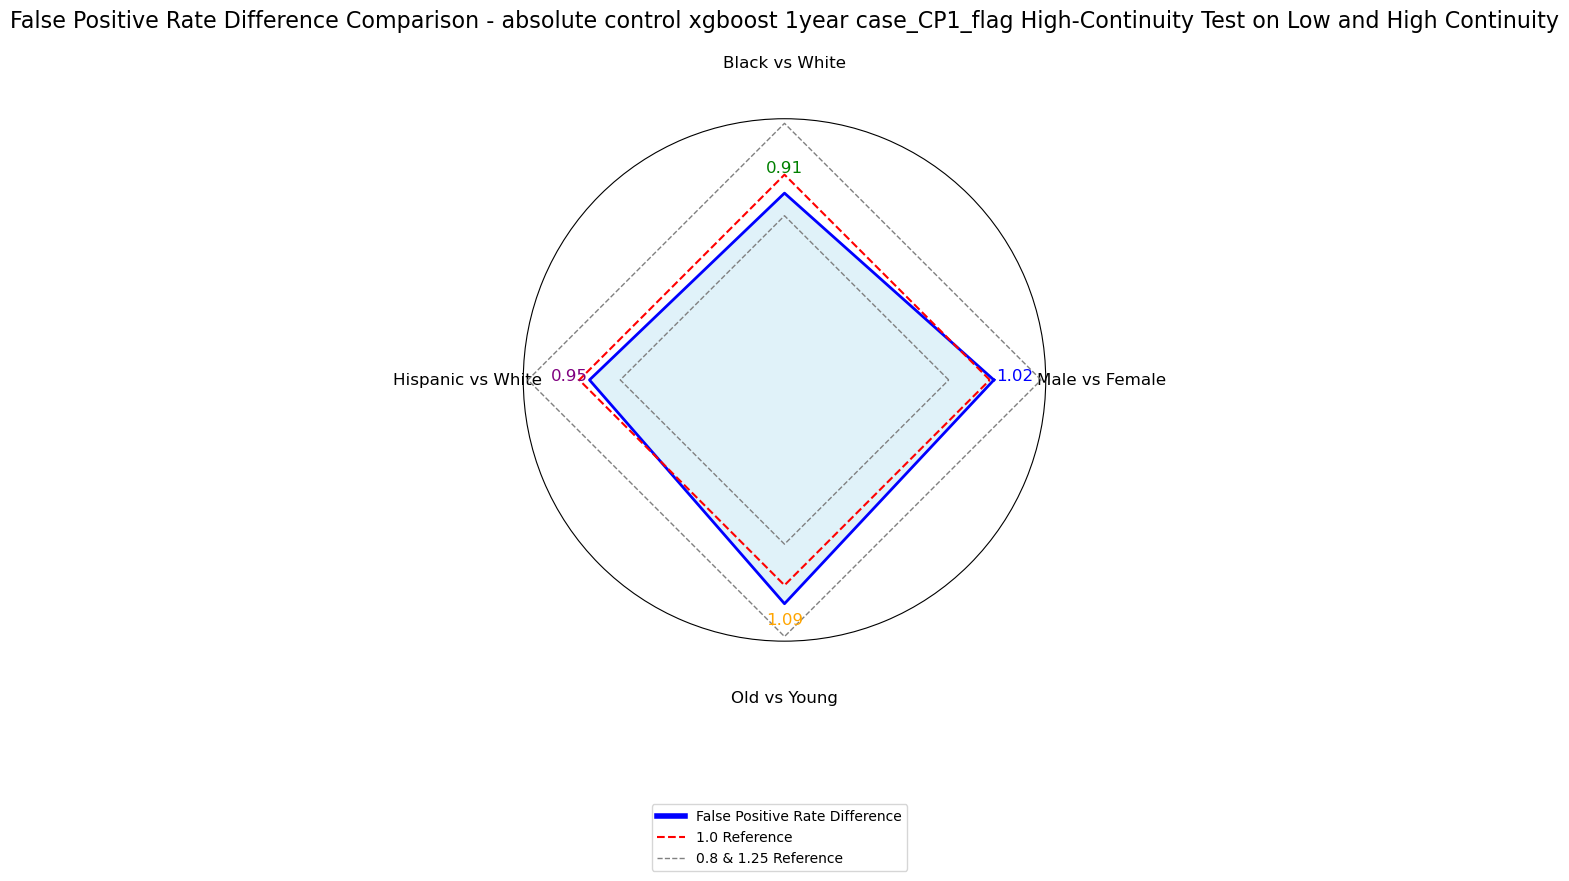

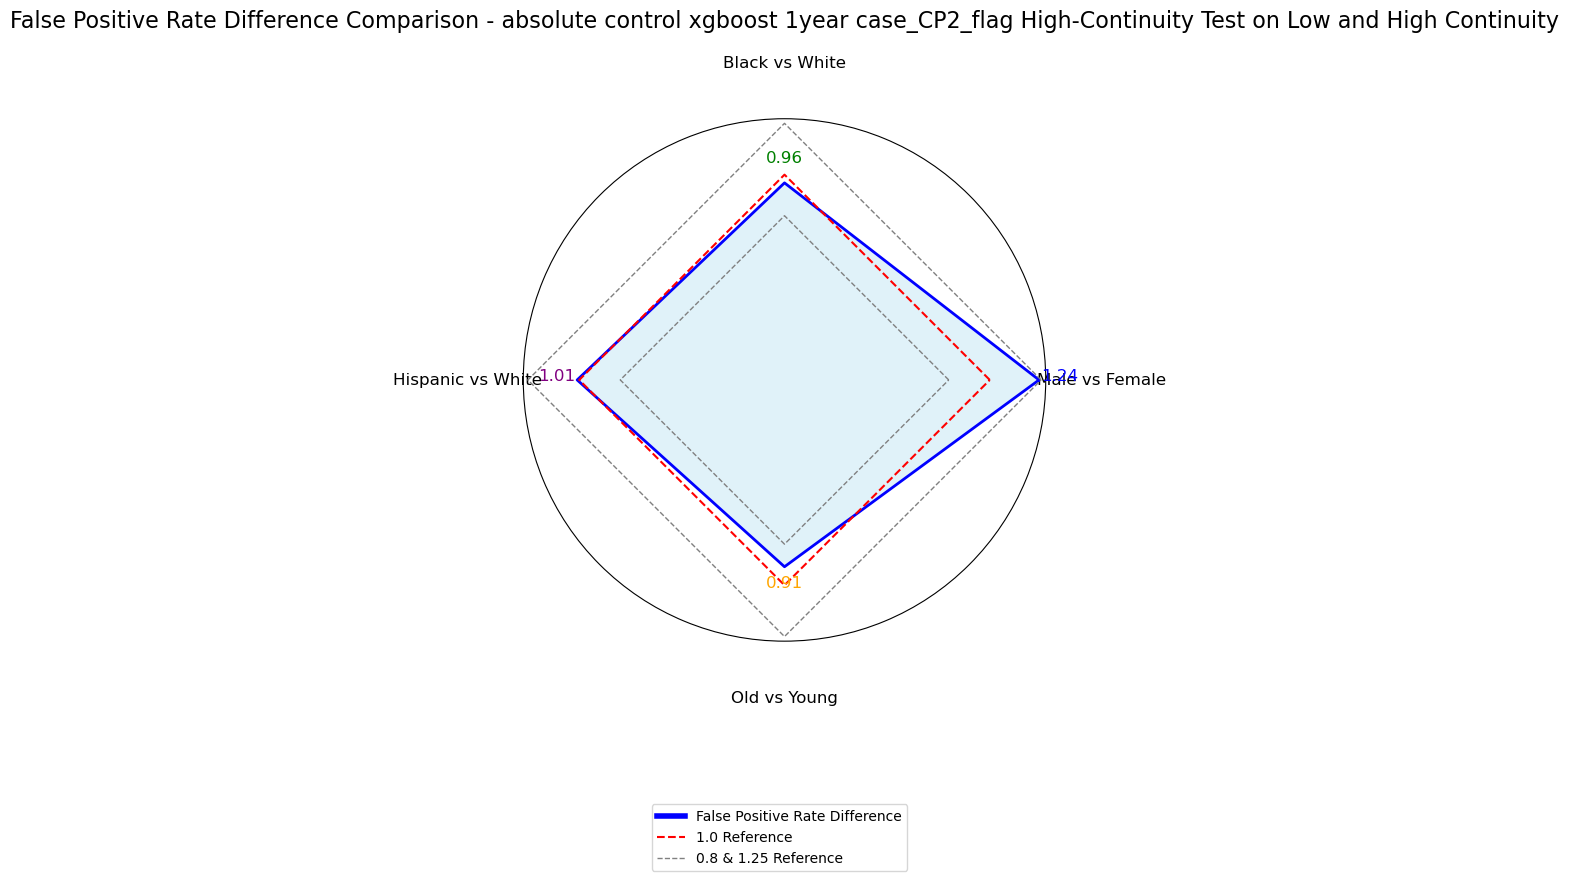

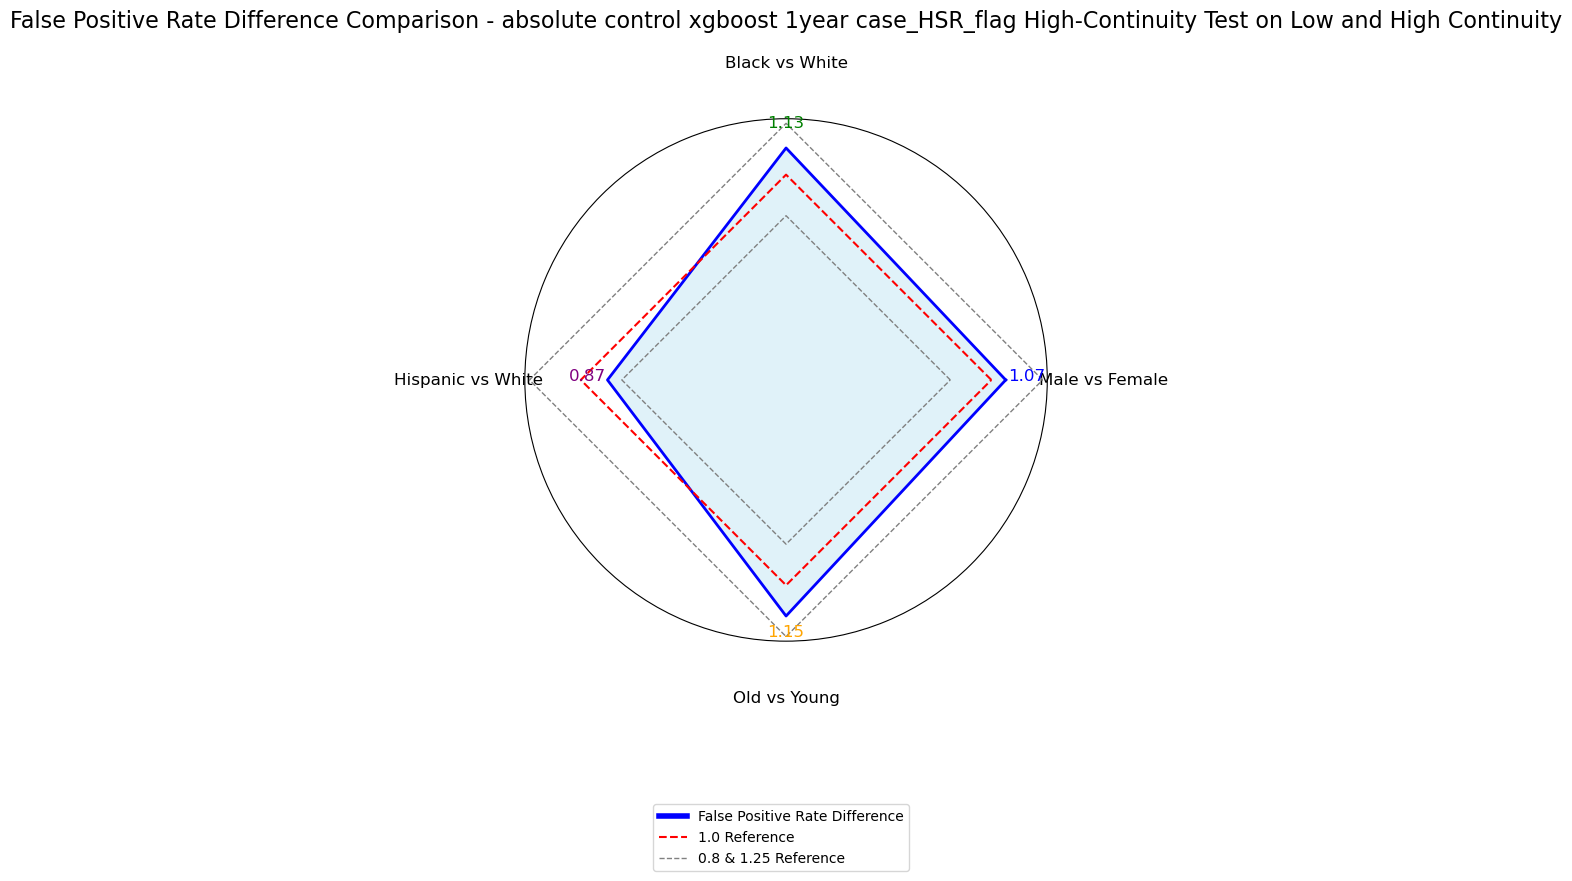

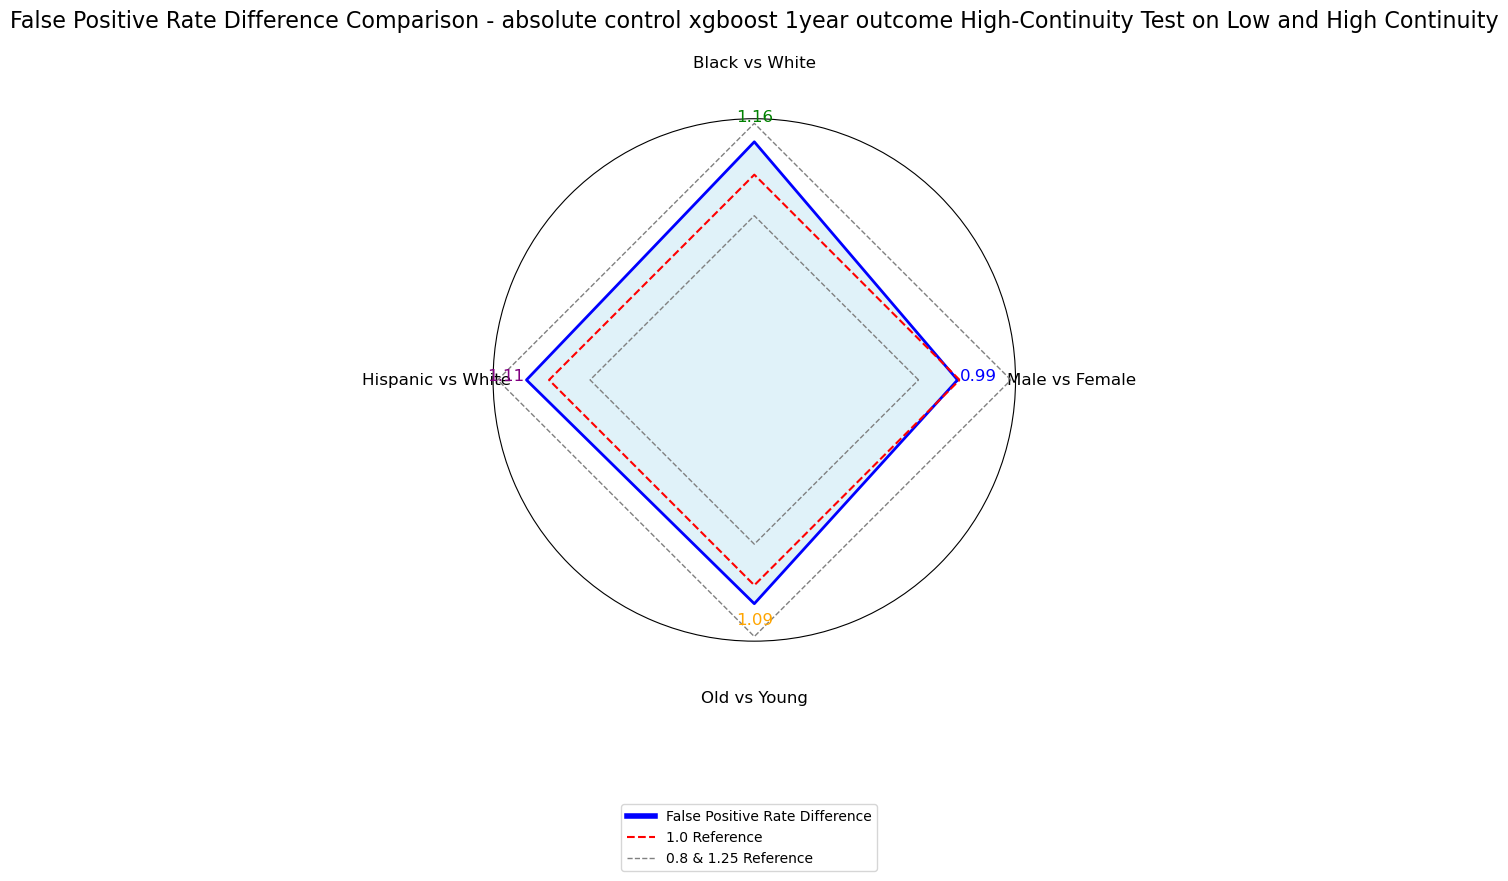

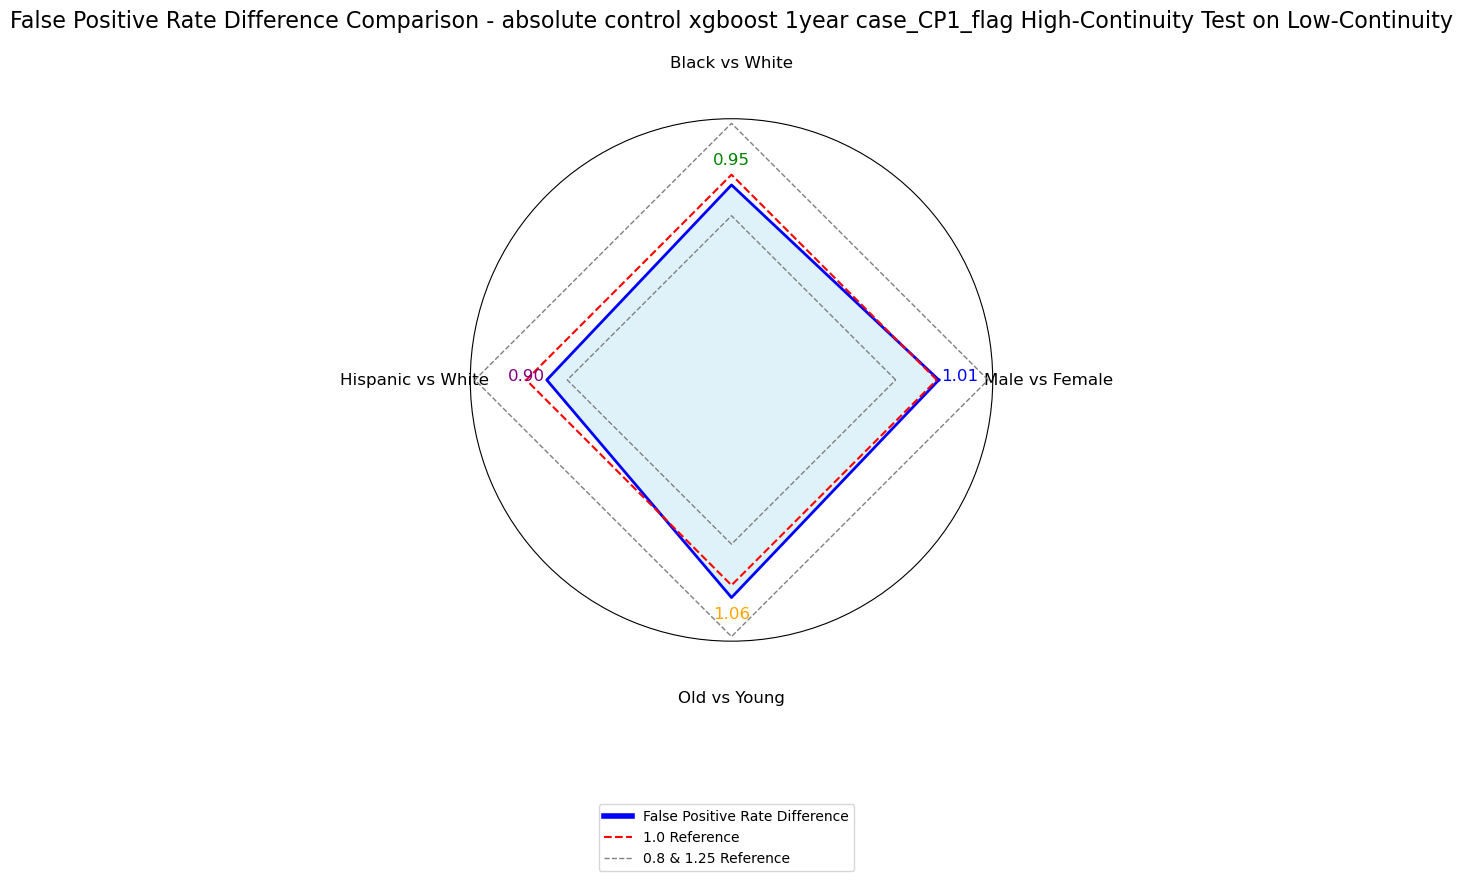

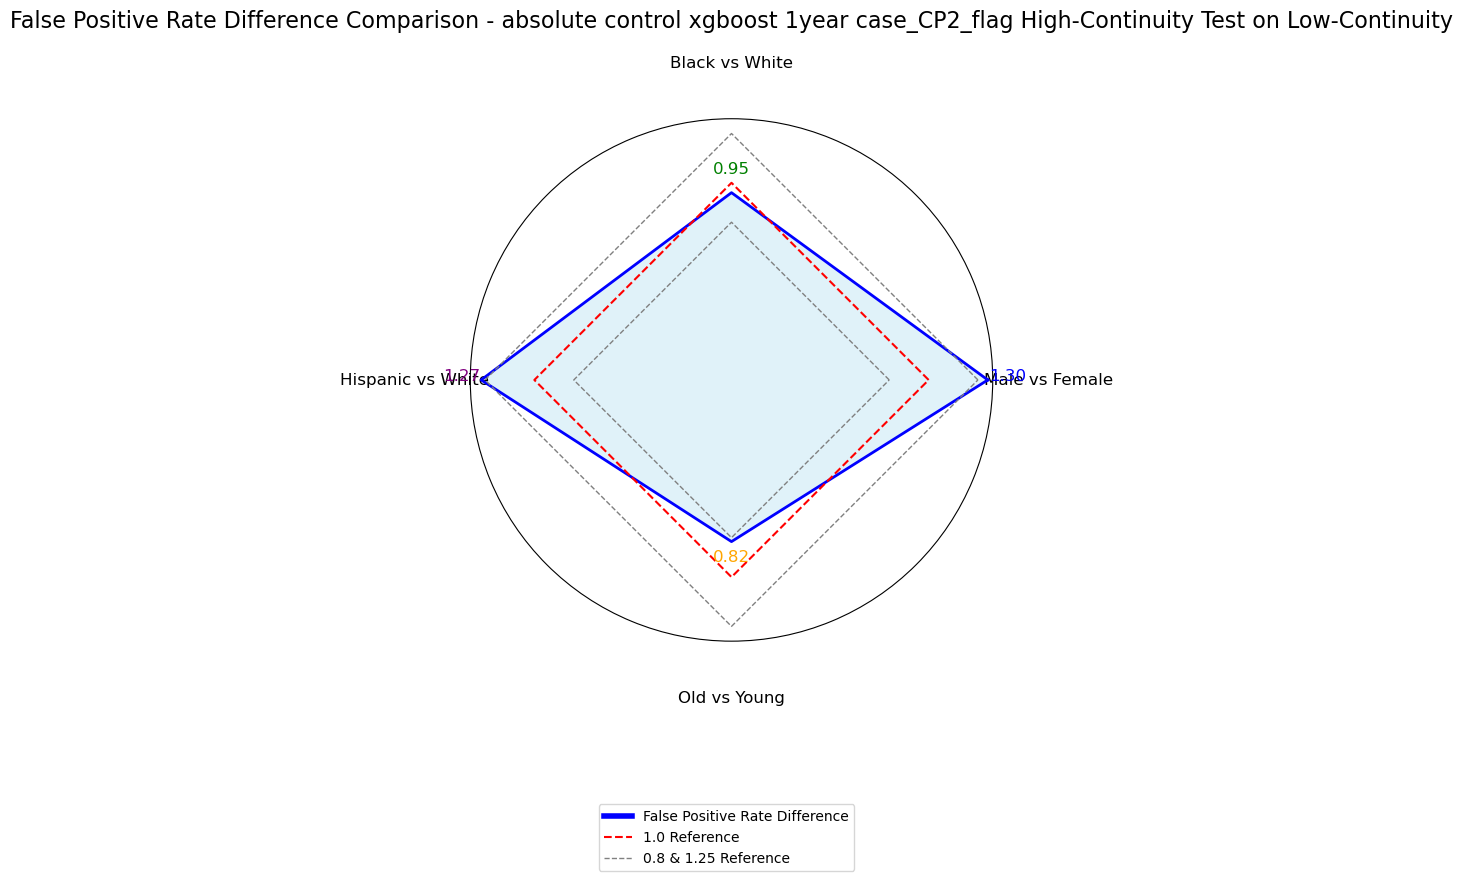

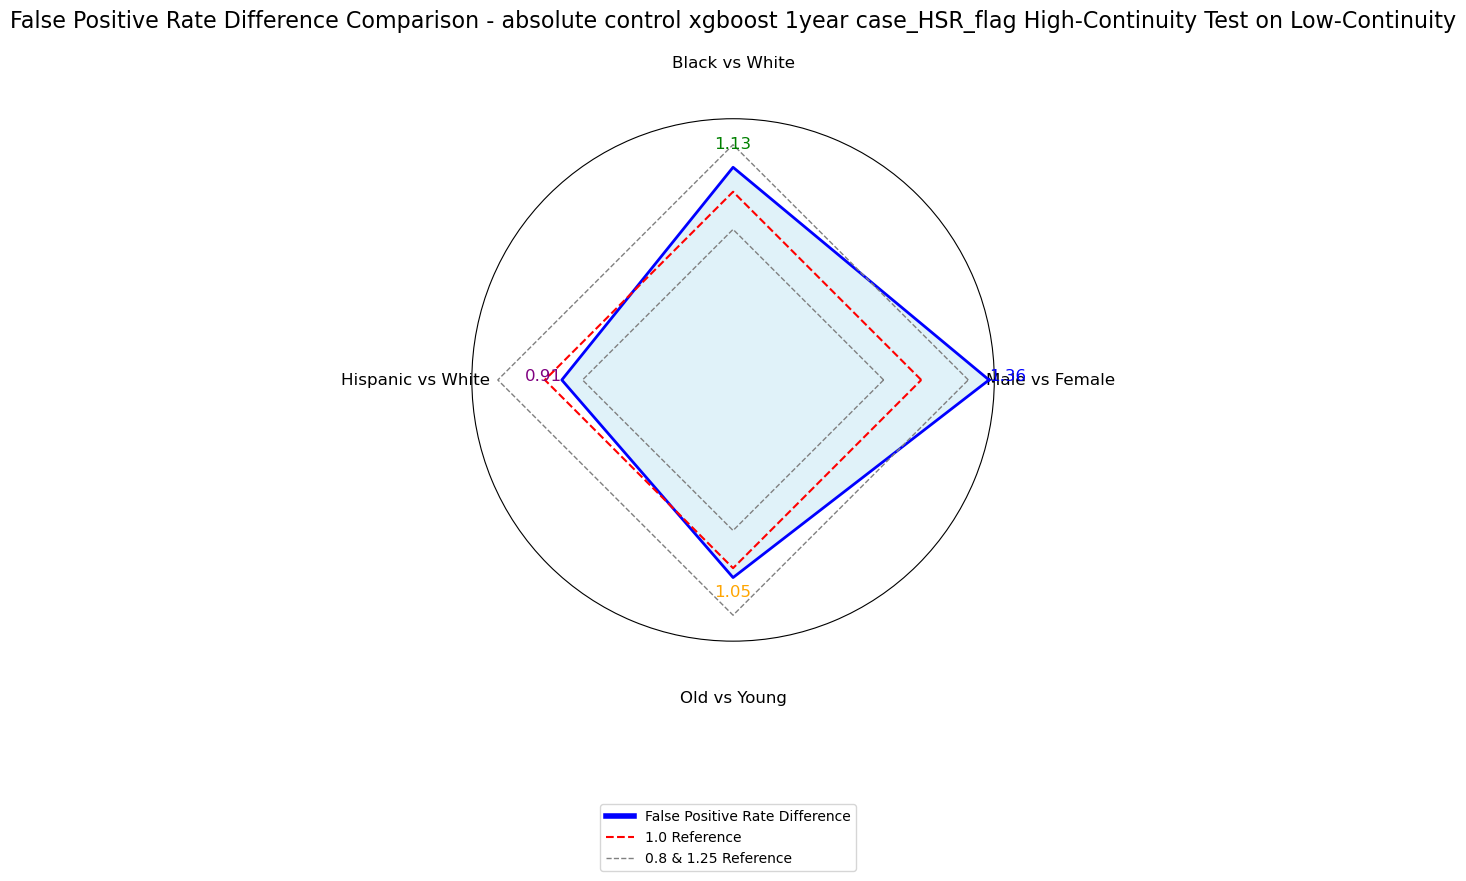

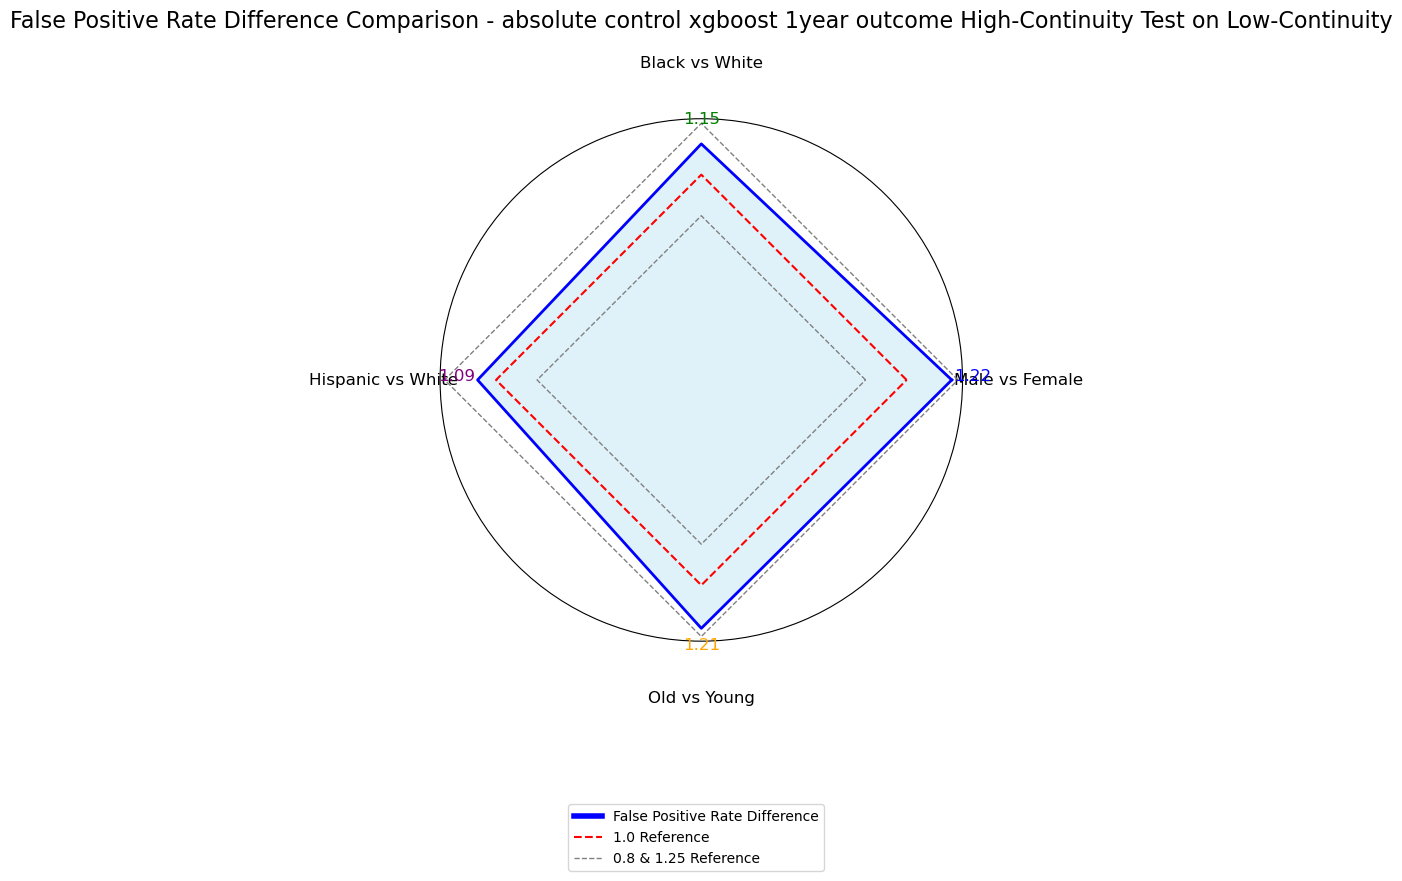

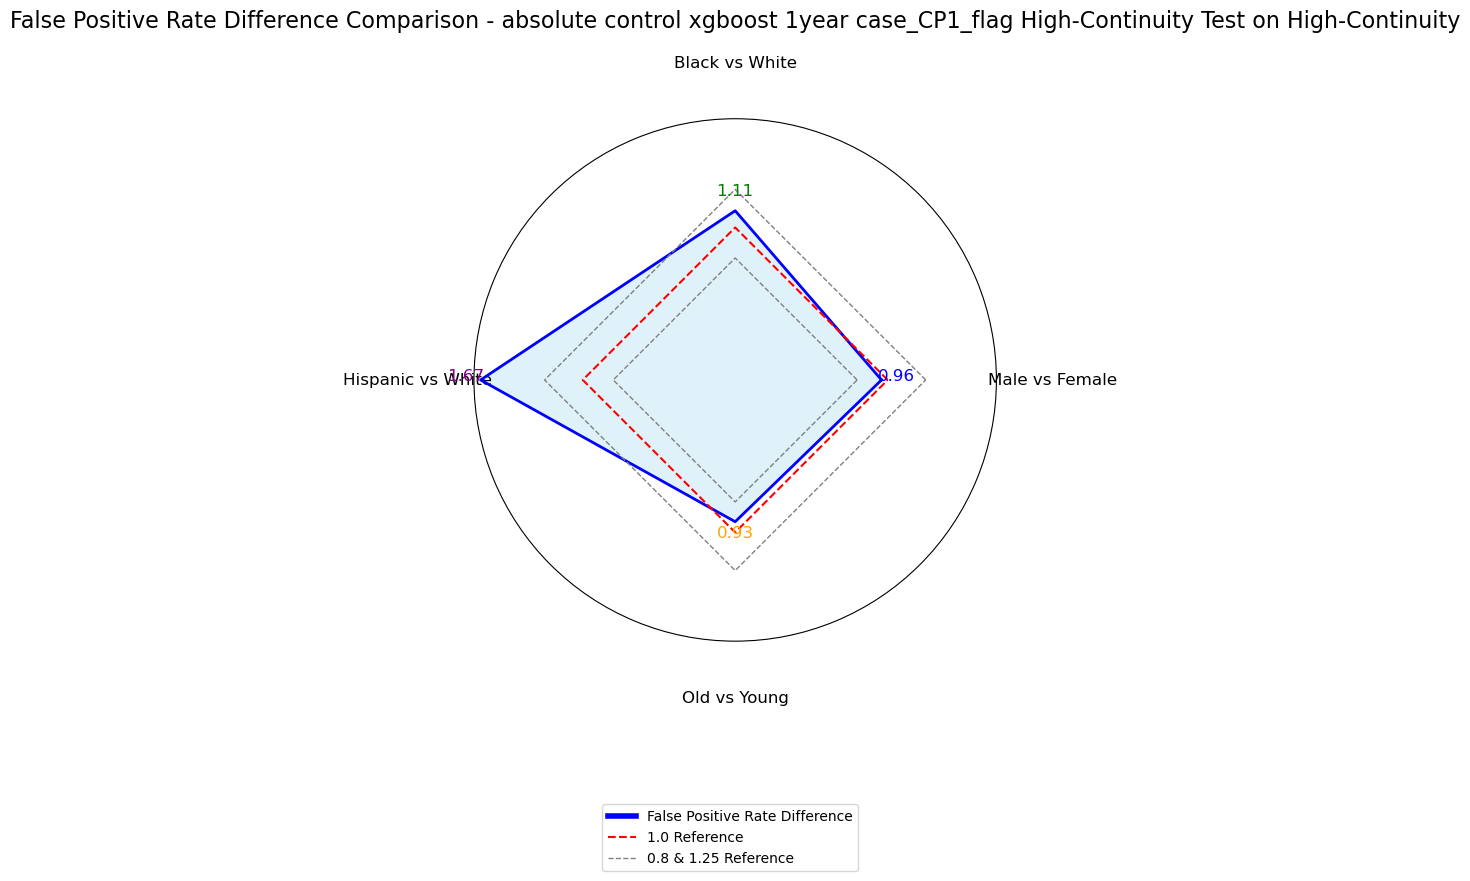

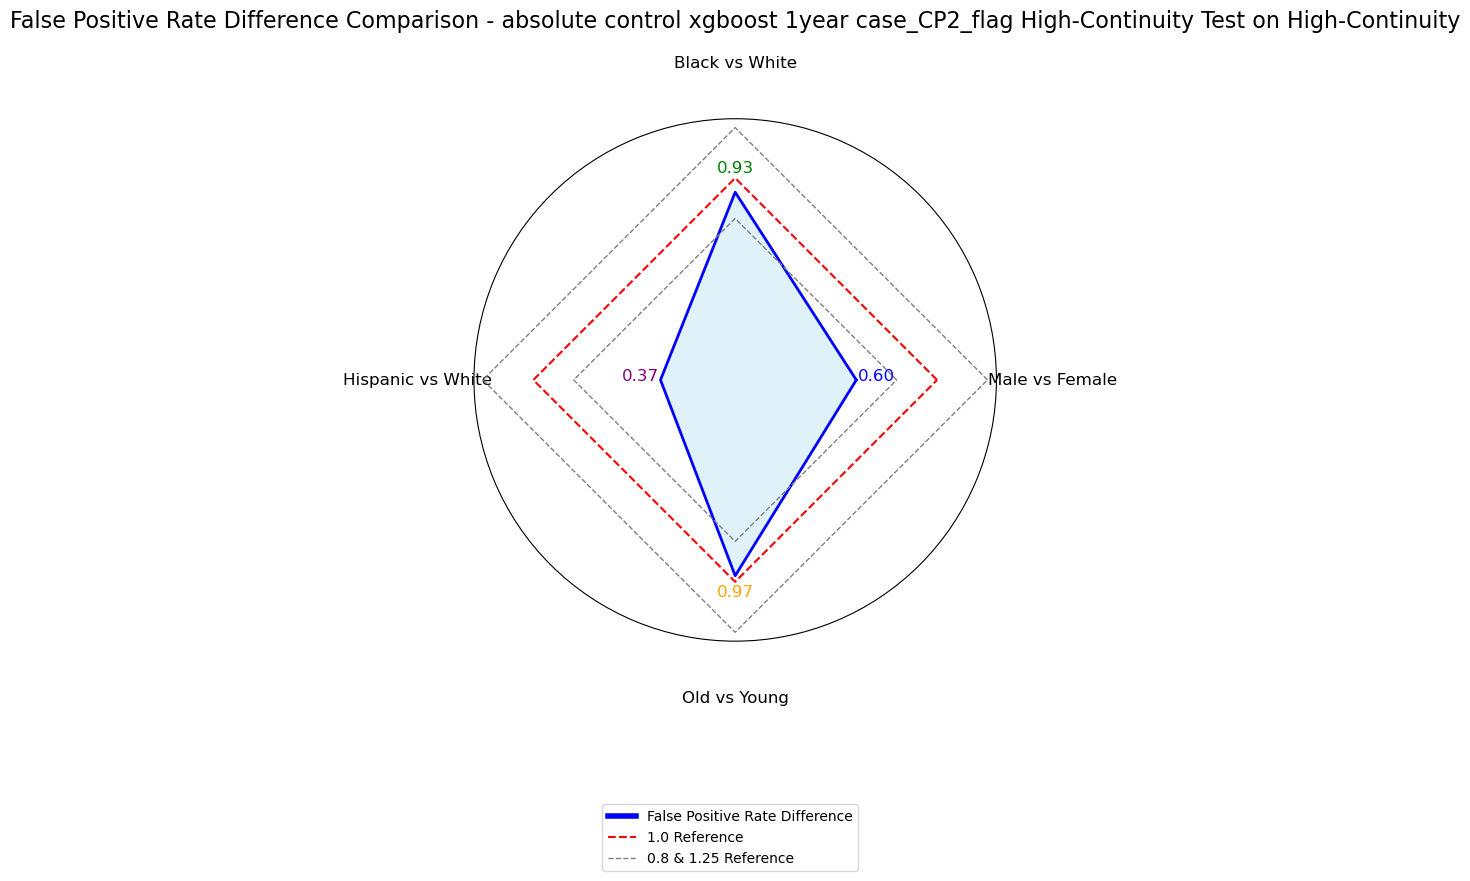

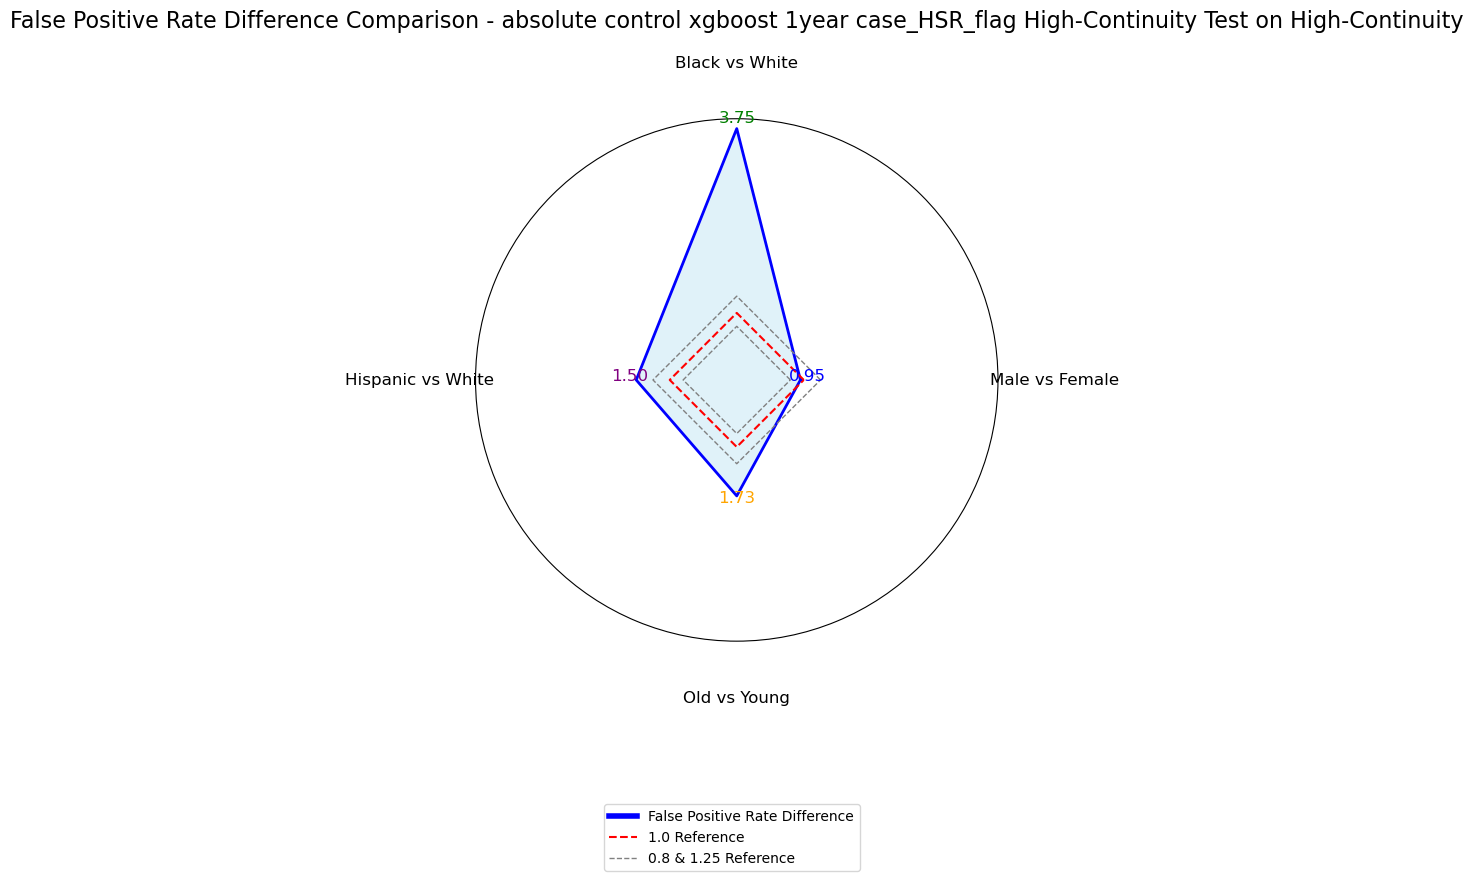

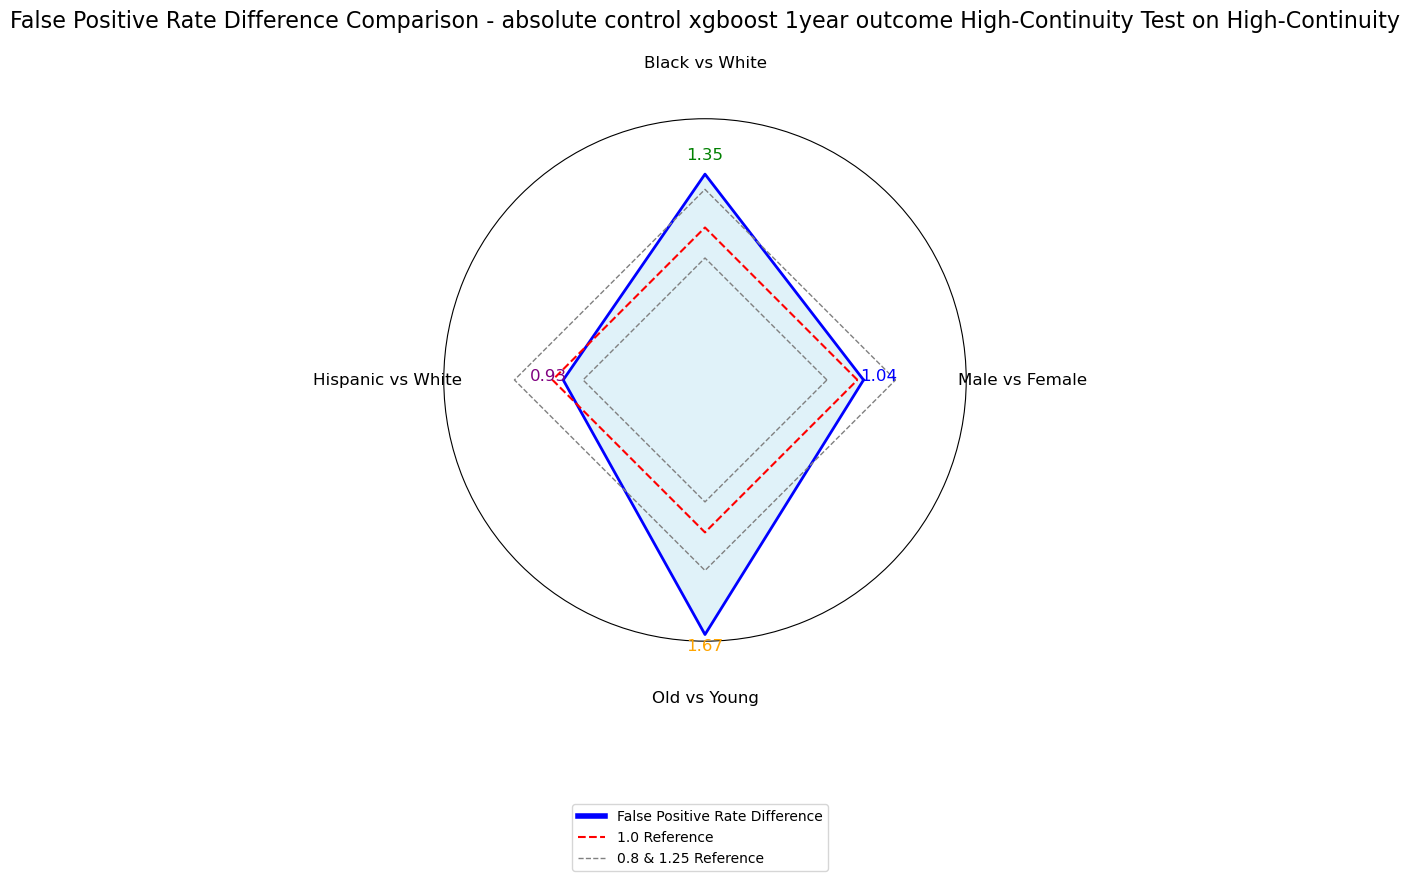

In [43]:
root = '../Output/SCORE_fairness'
save = f'{output_folder}/radar_plot'
os.makedirs(save, exist_ok = True)
for control in ['absolute_control']:
    for mpec in ['whole', 'smaller_threshold', 'larger_threshold']:
        for model in ['xgboost_fairness']:
            os.makedirs(os.path.join(save, model), exist_ok = True)
            for year in ['1year']:
                os.makedirs(os.path.join(save, model, year), exist_ok = True)
                for mpec_test in  ['whole', 'smaller_threshold', 'larger_threshold']:
                    for outcome in ['case_CP1_flag', 'case_CP2_flag', 'case_HSR_flag', 'outcome']:
                        os.makedirs(os.path.join(save, model, year, outcome), exist_ok = True)
                        metrics = [
                            "Statistical Parity Difference",
                            "Equal Opportunity Difference",
                            "Average Odds Difference",
                            "Disparate Impact",
                            "Predictive Parity",
                            "Calibration Difference",
                            "False Positive Rate Difference"
                        ]

                        ratios_groups = [
                            get_group(pd.read_csv(os.path.join(root,control,mpec,model,year,f'{outcome}mpec_{mpec}_Teston_{mpec_test}__fairness_sex_Female_sex_Male.csv'), index_col = 0).iloc[:,:-2]),
                            get_group(pd.read_csv(os.path.join(root,control,mpec,model,year,f'{outcome}mpec_{mpec}_Teston_{mpec_test}__fairness_race_ethnicity_NHB_race_ethnicity_NHW.csv'), index_col = 0).iloc[:,:-2]),
                            get_group(pd.read_csv(os.path.join(root,control,mpec,model,year,f'{outcome}mpec_{mpec}_Teston_{mpec_test}__fairness_race_ethnicity_Hispanic_race_ethnicity_NHW.csv'), index_col = 0).iloc[:,:-2]),
                            get_group(pd.read_csv(os.path.join(root,control,mpec,model,year,f'{outcome}mpec_{mpec}_Teston_{mpec_test}__fairness_age_age.csv'), index_col = 0).iloc[:,:-2])
                        ]
                        temp = [i[-1] for i in ratios_groups]

                        labels = ["Male vs Female", "Black vs White", "Hispanic vs White", "Old vs Young"]

                        colors = ["Blue","green","purple","orange"]
                        c = control.replace('_', ' ')
                        m = model.split('_')[0]
                        if 'whole' in mpec_test:
                            mpec1 = 'Low and High Continuity'
                        elif 'smaller' in mpec_test:
                            mpec1 = 'Low-Continuity'
                        elif 'larger' in mpec_test:
                            mpec1 = 'High-Continuity' 
                        if 'whole' in mpec:
                            mpec0 = 'Low and High Continuity'
                        elif 'smaller' in mpec:
                            mpec0 = 'Low-Continuity'
                        elif 'larger' in mpec:
                            mpec0 = 'High-Continuity'
                        if 'outcome' in outcome:
                            o = 'Single ICD Code'
                        t = f'{c} {m} {year} {outcome} {mpec0} Test on {mpec1}'
                        plot_last_metric(metrics = metrics, colors = colors, labels = labels, data = ratios_groups, path = f"{save}/{model}/{year}/{outcome}/{t}.png", title = t )

